## Import your dependencies, and read in the charity_data.csv to a Pandas DataFrame.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
print(application_df.head())

print(application_df.nunique())


        EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     

## Preprocess the dataset like you did in Deliverable 1, taking into account any modifications to optimize the model.

In [2]:
# Drop the non-beneficial ID columns, 'EIN'
application_df = application_df.drop(columns = ["EIN"])
application_df.columns





Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
application_df.nunique()



NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

### check density of INCOME_AMT 

In [4]:
income_count = application_df.groupby("INCOME_AMT").APPLICATION_TYPE.count().sort_values(ascending=False)
income_count

INCOME_AMT
0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

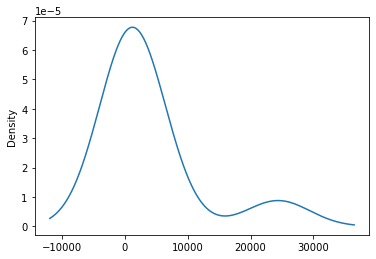

In [5]:
# Visualize the value counts of APPLICATION_TYPE
import matplotlib.pyplot as plt
income_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(income_count[income_count < 3000].index)

# Replace in dataframe
for app in replace_application:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(app,"1M+")


# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M+               2790
Name: INCOME_AMT, dtype: int64

### verify density of APPLICATION_TYPE

In [7]:
# Look at APPLICATION_TYPE value counts for binning
Application_Type_count = application_df.groupby("APPLICATION_TYPE").APPLICATION_TYPE.count().sort_values(ascending=False)
Application_Type_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

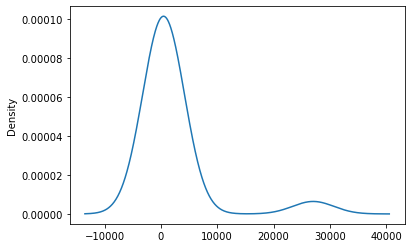

In [8]:
# Visualize the value counts of APPLICATION_TYPE
import matplotlib.pyplot as plt
Application_Type_count.plot.density()



In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(Application_Type_count[Application_Type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

### verify density of CLASSIFICATION

In [10]:
classification_count = application_df.groupby("CLASSIFICATION").APPLICATION_TYPE.count().sort_values(ascending=False)
classification_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2380        1
C2500        1
C2561        1
C8210        1
Name: APPLICATION_TYPE, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

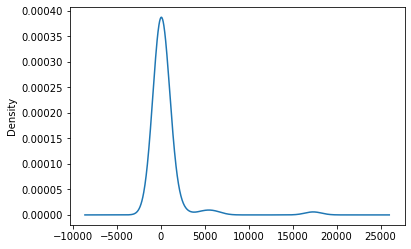

In [11]:
# Visualize the value counts of CLASSIFICATION
import matplotlib.pyplot as plt
classification_count.plot.density()


In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

## verify density of NAME

In [13]:
name_count = application_df.groupby("NAME").NAME.count().sort_values(ascending=False)
name_count

NAME
PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
FUSION ARTS UNLIMITED INC                             1
FURRST AND FURRMOST POOCH SANCTUARY INC               1
FURNISHING HOPE AZ INC                                1
FUNNY RIVER EMERGENCY SERVICES                        1
ZURICH PUBLISHING FOUNDATION INC                      1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

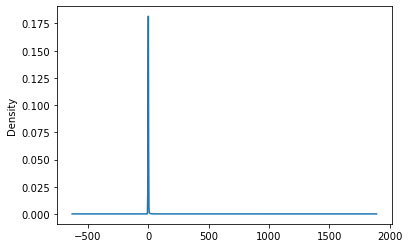

In [14]:
# Visualize the value counts of APPLICATION_TYPE
import matplotlib.pyplot as plt
name_count.plot.density()

In [15]:
# Determine which values to replace if counts are less than ...?
replace_application = list(name_count[name_count < 10].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Other")


# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: NAME, Length: 223, dtype: int64

### Encode categorical variables using one-hot encoding and Standardize numerical variables using Scikit-Learn’s StandardScaler class, then scale the data.

In [16]:
# Generate our categorical variable lists
application_cat = ["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS", "ASK_AMT", "STATUS", "NAME"]



In [17]:
# Create a OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat].values))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\ramon\.conda\envs\MachineLearning\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,NAME_VFW AUXILIARY DEPARTMENT OF MISSISSIPPI,NAME_VFW AUXILIARY DEPARTMENT OF OKLAHOMA INC,NAME_WASHINGTON STATE GRANGE,NAME_WASHINGTON STATE UNIVERSITY,NAME_WEST HOUSTON AQUATIC LEAGUE INC,NAME_WOMEN IN AVIATION INTERNATIONAL,NAME_WORKERS UNITED,NAME_YOUNG ENTREPRENEURS ORGANIZATION,NAME_ZETA PHI BETA SORORITY INC,NAME_ZONTA INTERNATIONAL
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df_merged = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df_merged.head(5)

C:\Users\ramon\AppData\Local\Temp/ipykernel_32220/2386188981.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df_merged = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)


,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,NAME_VFW AUXILIARY DEPARTMENT OF MISSISSIPPI,NAME_VFW AUXILIARY DEPARTMENT OF OKLAHOMA INC,NAME_WASHINGTON STATE GRANGE,NAME_WASHINGTON STATE UNIVERSITY,NAME_WEST HOUSTON AQUATIC LEAGUE INC,NAME_WOMEN IN AVIATION INTERNATIONAL,NAME_WORKERS UNITED,NAME_YOUNG ENTREPRENEURS ORGANIZATION,NAME_ZETA PHI BETA SORORITY INC,NAME_ZONTA INTERNATIONAL
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df_merged["IS_SUCCESSFUL"]
X = application_df_merged.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Design a neural network model, taking into account any modifications that will optimize the model to achieve higher than 75% accuracy.

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 16


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900900    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                976       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 907,953
Trainable params: 907,953
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:

import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/AlphabetSoupCharity_Optimization.h5"

# Create a callback that saves the model's weights every  5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])


Epoch 1/100
  1/804 [..............................] - ETA: 7:30 - loss: 0.7192 - accuracy: 0.5625
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  6/804 [..............................] - ETA: 11s - loss: 0.7586 - accuracy: 0.4792 
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 14/804 [..............................] - ETA: 7s - loss: 0.7298 - accuracy: 0.4888 
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 21/804 [..............................] - ETA: 7s - loss: 0.7058 - accuracy: 0.5610
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 28/804 [>.............................] - ETA: 7s - loss: 0.6991 - accuracy: 0.5614
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 35/804 [>.............................] - ETA: 6s - loss: 0.6893 - accuracy: 0.5759
Epoch 0000

291/804 [=========>....................] - ETA: 4s - loss: 0.5364 - accuracy: 0.7307
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
299/804 [==========>...................] - ETA: 4s - loss: 0.5356 - accuracy: 0.7308
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
306/804 [==========>...................] - ETA: 4s - loss: 0.5345 - accuracy: 0.7317
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
315/804 [==========>...................] - ETA: 4s - loss: 0.5326 - accuracy: 0.7324
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
322/804 [===========>..................] - ETA: 4s - loss: 0.5326 - accuracy: 0.7319
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00001: saving model to chec


Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
596/804 [=====================>........] - ETA: 1s - loss: 0.5077 - accuracy: 0.7502
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
604/804 [=====================>........] - ETA: 1s - loss: 0.5084 - accuracy: 0.7499
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
611/804 [=====================>........] - ETA: 1s - loss: 0.5074 - accuracy: 0.7507
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
619/804 [======================>.......] - ETA: 1s - loss: 0.5066 - accuracy: 0.7509
Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00001: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
626/804 [======================>.......] - ETA: 1s - loss: 0.5066 - accuracy: 0.7508
Epoch 00001: saving model to chec

 82/804 [==>...........................] - ETA: 5s - loss: 0.3332 - accuracy: 0.8678
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 90/804 [==>...........................] - ETA: 5s - loss: 0.3324 - accuracy: 0.8677
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 97/804 [==>...........................] - ETA: 5s - loss: 0.3343 - accuracy: 0.8653
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
105/804 [==>...........................] - ETA: 5s - loss: 0.3356 - accuracy: 0.8646
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
112/804 [===>..........................] - ETA: 5s - loss: 0.3338 - accuracy: 0.8652
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
121/804 [===>.....................

387/804 [=============>................] - ETA: 3s - loss: 0.3331 - accuracy: 0.8559
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
397/804 [=============>................] - ETA: 3s - loss: 0.3327 - accuracy: 0.8557
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
407/804 [==============>...............] - ETA: 2s - loss: 0.3330 - accuracy: 0.8551
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
417/804 [==============>...............] - ETA: 2s - loss: 0.3329 - accuracy: 0.8554
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
427/804 [==============>...............]

687/804 [========================>.....] - ETA: 0s - loss: 0.3310 - accuracy: 0.8549
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
695/804 [========================>.....] - ETA: 0s - loss: 0.3309 - accuracy: 0.8549
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
702/804 [=========================>....] - ETA: 0s - loss: 0.3305 - accuracy: 0.8552
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
711/804 [=========================>....] - ETA: 0s - loss: 0.3302 - accuracy: 0.8555
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
717/804 [=========================>....] - ETA: 0s - loss: 0.3299 - accuracy: 0.8557
Epoch 00002: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
726/804 [=========================

183/804 [=====>........................] - ETA: 4s - loss: 0.3125 - accuracy: 0.8574
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
189/804 [======>.......................] - ETA: 4s - loss: 0.3126 - accuracy: 0.8573
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
197/804 [======>.......................] - ETA: 4s - loss: 0.3128 - accuracy: 0.8574
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
203/804 [======>.......................] - ETA: 4s - loss: 0.3131 - accuracy: 0.8571
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
211/804 [======>.......................] - ETA: 4s - loss: 0.3119 - accuracy: 0.8572
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
218/804 [=======>.................

477/804 [================>.............] - ETA: 2s - loss: 0.3090 - accuracy: 0.8586
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
485/804 [=================>............] - ETA: 2s - loss: 0.3099 - accuracy: 0.8579
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
493/804 [=================>............] - ETA: 2s - loss: 0.3102 - accuracy: 0.8576
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
502/804 [=================>............] - ETA: 2s - loss: 0.3102 - accuracy: 0.8574
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
508/804 [=================>............] - ETA: 2s - loss: 0.3107 - accuracy: 0.8572
Epoch 00003: saving model to chec

792/804 [============================>.] - ETA: 0s - loss: 0.3078 - accuracy: 0.8598
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
800/804 [============================>.] - ETA: 0s - loss: 0.3071 - accuracy: 0.8604
Epoch 00003: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 6s 8ms/step - loss: 0.3071 - accuracy: 0.8602
Epoch 4/100
  1/804 [..............................] - ETA: 3s - loss: 0.2964 - accuracy: 0.8750
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  9/804 [..............................] - ETA: 7s - loss: 0.2859 - accuracy: 0.8819
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 14/804 [..............................] - ETA: 9s - loss: 0.2969 - accuracy: 0.8772
Epoch 0000

287/804 [=========>....................] - ETA: 3s - loss: 0.3011 - accuracy: 0.8592
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
294/804 [=========>....................] - ETA: 3s - loss: 0.2995 - accuracy: 0.8601
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
301/804 [==========>...................] - ETA: 3s - loss: 0.2989 - accuracy: 0.8605
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
309/804 [==========>...................] - ETA: 3s - loss: 0.2989 - accuracy: 0.8603
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
317/804 [==========>...................] - ETA: 3s - loss: 0.2992 - accuracy: 0.8595
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00004: saving model to chec

591/804 [=====================>........] - ETA: 1s - loss: 0.2999 - accuracy: 0.8600
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
597/804 [=====================>........] - ETA: 1s - loss: 0.2999 - accuracy: 0.8601
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
603/804 [=====================>........] - ETA: 1s - loss: 0.2995 - accuracy: 0.8603
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
607/804 [=====================>........] - ETA: 1s - loss: 0.2996 - accuracy: 0.8603
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
612/804 [=====================>........] - ETA: 1s - loss: 0.2999 - accuracy: 0.8601
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
618/804 [======================>.......] - ETA: 1s - loss: 0.3005 - accuracy: 0.8600
Epoch 00004: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00004: saving model t

 55/804 [=>............................] - ETA: 7s - loss: 0.2932 - accuracy: 0.8642
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 61/804 [=>............................] - ETA: 6s - loss: 0.2935 - accuracy: 0.8632
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 66/804 [=>............................] - ETA: 6s - loss: 0.2983 - accuracy: 0.8598
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 73/804 [=>............................] - ETA: 6s - loss: 0.2967 - accuracy: 0.8600
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 80/804 [=>............................] - ETA: 6s - loss: 0.3005 - accuracy: 0.8562
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 88/804 [==>...........................] - ETA: 6s - loss: 0.3004 - accuracy: 0.8572
Epoch 00005: saving model t

370/804 [============>.................] - ETA: 3s - loss: 0.2973 - accuracy: 0.8594
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
378/804 [=============>................] - ETA: 3s - loss: 0.2964 - accuracy: 0.8596
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
385/804 [=============>................] - ETA: 3s - loss: 0.2957 - accuracy: 0.8601
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
394/804 [=============>................] - ETA: 3s - loss: 0.2965 - accuracy: 0.8595
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
401/804 [=============>................] - ETA: 2s - loss: 0.2965 - accuracy: 0.8595
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00005: saving model to chec

679/804 [========================>.....] - ETA: 0s - loss: 0.2981 - accuracy: 0.8604
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
685/804 [========================>.....] - ETA: 0s - loss: 0.2977 - accuracy: 0.8608
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
691/804 [========================>.....] - ETA: 0s - loss: 0.2985 - accuracy: 0.8606
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
697/804 [=========================>....] - ETA: 0s - loss: 0.2988 - accuracy: 0.8604
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
704/804 [=========================>....] - ETA: 0s - loss: 0.2984 - accuracy: 0.8609
Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00005: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
710/804 [=========================

166/804 [=====>........................] - ETA: 4s - loss: 0.2917 - accuracy: 0.8667
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
172/804 [=====>........................] - ETA: 4s - loss: 0.2931 - accuracy: 0.8657
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
179/804 [=====>........................] - ETA: 4s - loss: 0.2930 - accuracy: 0.8649
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
186/804 [=====>........................] - ETA: 4s - loss: 0.2943 - accuracy: 0.8636
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
193/804 [======>.......................] - ETA: 4s - loss: 0.2940 - accuracy: 0.8642
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
201/804 [======>..................

436/804 [===============>..............] - ETA: 3s - loss: 0.2974 - accuracy: 0.8611
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
441/804 [===============>..............] - ETA: 3s - loss: 0.2971 - accuracy: 0.8613
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
446/804 [===============>..............] - ETA: 3s - loss: 0.2971 - accuracy: 0.8613
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
451/804 [===============>..............] - ETA: 3s - loss: 0.2973 - accuracy: 0.8611
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
456/804 [================>.............] - ETA: 3s - loss: 0.2972 - accuracy: 0.8610
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
461/804 [================>.............] - ETA: 3s - loss: 0.2964 - accuracy: 0.8617
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
466/804 [================>..

722/804 [=========================>....] - ETA: 0s - loss: 0.2954 - accuracy: 0.8629
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
731/804 [==========================>...] - ETA: 0s - loss: 0.2953 - accuracy: 0.8630
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
740/804 [==========================>...] - ETA: 0s - loss: 0.2955 - accuracy: 0.8631
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
746/804 [==========================>...] - ETA: 0s - loss: 0.2958 - accuracy: 0.8629
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
754/804 [===========================>..] - ETA: 0s - loss: 0.2952 - accuracy: 0.8632
Epoch 00006: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00006: saving model to chec

222/804 [=======>......................] - ETA: 4s - loss: 0.2908 - accuracy: 0.8633
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
231/804 [=======>......................] - ETA: 3s - loss: 0.2921 - accuracy: 0.8623
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
237/804 [=======>......................] - ETA: 3s - loss: 0.2934 - accuracy: 0.8609
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
244/804 [========>.....................] - ETA: 3s - loss: 0.2928 - accuracy: 0.8612
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
251/804 [========>.....................] - ETA: 3s - loss: 0.2937 - accuracy: 0.8612
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
257/804 [========>................

526/804 [==================>...........] - ETA: 2s - loss: 0.2965 - accuracy: 0.8612
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
532/804 [==================>...........] - ETA: 2s - loss: 0.2960 - accuracy: 0.8614
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
540/804 [===================>..........] - ETA: 1s - loss: 0.2954 - accuracy: 0.8616
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
547/804 [===================>..........] - ETA: 1s - loss: 0.2956 - accuracy: 0.8616
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
556/804 [===================>..........] - ETA: 1s - loss: 0.2963 - accuracy: 0.8611
Epoch 00007: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00007: saving model to chec

 23/804 [..............................] - ETA: 6s - loss: 0.2632 - accuracy: 0.8845
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 30/804 [>.............................] - ETA: 6s - loss: 0.2779 - accuracy: 0.8792
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 37/804 [>.............................] - ETA: 6s - loss: 0.2745 - accuracy: 0.8792
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 43/804 [>.............................] - ETA: 6s - loss: 0.2853 - accuracy: 0.8721
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 51/804 [>.............................] - ETA: 5s - loss: 0.2792 - accuracy: 0.8725
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 58/804 [=>.......................

316/804 [==========>...................] - ETA: 4s - loss: 0.2910 - accuracy: 0.8634
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
323/804 [===========>..................] - ETA: 3s - loss: 0.2920 - accuracy: 0.8630
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
332/804 [===========>..................] - ETA: 3s - loss: 0.2928 - accuracy: 0.8627
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
339/804 [===========>..................] - ETA: 3s - loss: 0.2938 - accuracy: 0.8620
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
348/804 [===========>..................] - ETA: 3s - loss: 0.2944 - accuracy: 0.8619
Epoch 00008: saving model to chec

618/804 [======================>.......] - ETA: 1s - loss: 0.2926 - accuracy: 0.8632
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
627/804 [======================>.......] - ETA: 1s - loss: 0.2931 - accuracy: 0.8631
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
634/804 [======================>.......] - ETA: 1s - loss: 0.2935 - accuracy: 0.8626
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
643/804 [======================>.......] - ETA: 1s - loss: 0.2932 - accuracy: 0.8628
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
652/804 [=======================>......] - ETA: 1s - loss: 0.2933 - accuracy: 0.8628
Epoch 00008: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00008: saving model to chec

103/804 [==>...........................] - ETA: 6s - loss: 0.2852 - accuracy: 0.8677
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
109/804 [===>..........................] - ETA: 6s - loss: 0.2864 - accuracy: 0.8670
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
118/804 [===>..........................] - ETA: 6s - loss: 0.2927 - accuracy: 0.8652
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
124/804 [===>..........................] - ETA: 6s - loss: 0.2934 - accuracy: 0.8654
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
130/804 [===>..........................] - ETA: 6s - loss: 0.2929 - accuracy: 0.8661
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
137/804 [====>....................


Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
409/804 [==============>...............] - ETA: 3s - loss: 0.2930 - accuracy: 0.8615
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
417/804 [==============>...............] - ETA: 3s - loss: 0.2931 - accuracy: 0.8614
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
424/804 [==============>...............] - ETA: 3s - loss: 0.2931 - accuracy: 0.8614
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
431/804 [===============>..............] - ETA: 2s - loss: 0.2928 - accuracy: 0.8613
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
438/804 [===============>..............] - ETA: 2s - loss: 0.2934 - accuracy: 0.8611
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00009: saving model to chec

691/804 [========================>.....] - ETA: 0s - loss: 0.2928 - accuracy: 0.8619
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
696/804 [========================>.....] - ETA: 0s - loss: 0.2928 - accuracy: 0.8619
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
702/804 [=========================>....] - ETA: 0s - loss: 0.2928 - accuracy: 0.8618
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
708/804 [=========================>....] - ETA: 0s - loss: 0.2934 - accuracy: 0.8615
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
714/804 [=========================>....] - ETA: 0s - loss: 0.2930 - accuracy: 0.8619
Epoch 00009: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
720/804 [=========================>....] - ETA: 0s - loss: 0.2930 - accuracy: 0.8621
Epoch 00009: saving model t

175/804 [=====>........................] - ETA: 4s - loss: 0.2830 - accuracy: 0.8670
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
183/804 [=====>........................] - ETA: 4s - loss: 0.2841 - accuracy: 0.8663
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
190/804 [======>.......................] - ETA: 4s - loss: 0.2831 - accuracy: 0.8668
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
199/804 [======>.......................] - ETA: 4s - loss: 0.2836 - accuracy: 0.8659
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
206/804 [======>.......................] - ETA: 4s - loss: 0.2827 - accuracy: 0.8667
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00010: saving model to chec

Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
482/804 [================>.............] - ETA: 2s - loss: 0.2898 - accuracy: 0.8637
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
490/804 [=================>............] - ETA: 2s - loss: 0.2905 - accuracy: 0.8632
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
498/804 [=================>............] - ETA: 2s - loss: 0.2912 - accuracy: 0.8627
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
505/804 [=================>............] - ETA: 2s - loss: 0.2909 - accuracy: 0.8629
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
514/804 [==================>...........] - ETA: 2s - loss: 0.2901 - accuracy: 0.8635
Epoch 00010: saving model to check

790/804 [============================>.] - ETA: 0s - loss: 0.2910 - accuracy: 0.8637
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
799/804 [============================>.] - ETA: 0s - loss: 0.2909 - accuracy: 0.8638
Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00010: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 6s 7ms/step - loss: 0.2912 - accuracy: 0.8637
Epoch 11/100
  1/804 [..............................] - ETA: 4s - loss: 0.2960 - accuracy: 0.8125
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  9/804 [..............................] - ETA: 5s - loss: 0.2975 - accuracy: 0.8576
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 16/804 [..............................] - ETA: 5s - loss: 0.2943 - accuracy: 0.8555
Epoch 000

291/804 [=========>....................] - ETA: 3s - loss: 0.2929 - accuracy: 0.8619
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
296/804 [==========>...................] - ETA: 3s - loss: 0.2941 - accuracy: 0.8612
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
303/804 [==========>...................] - ETA: 3s - loss: 0.2943 - accuracy: 0.8609
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
310/804 [==========>...................] - ETA: 3s - loss: 0.2939 - accuracy: 0.8612
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
316/804 [==========>...................] - ETA: 3s - loss: 0.2927 - accuracy: 0.8618
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
322/804 [===========>..................] - ETA: 3s - loss: 0.2926 - accuracy: 0.8619
Epoch 00011: saving model t

591/804 [=====================>........] - ETA: 1s - loss: 0.2909 - accuracy: 0.8637
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
599/804 [=====================>........] - ETA: 1s - loss: 0.2906 - accuracy: 0.8640
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
606/804 [=====================>........] - ETA: 1s - loss: 0.2902 - accuracy: 0.8643
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
615/804 [=====================>........] - ETA: 1s - loss: 0.2903 - accuracy: 0.8644
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
622/804 [======================>.......] - ETA: 1s - loss: 0.2905 - accuracy: 0.8643
Epoch 00011: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00011: saving model to chec

 92/804 [==>...........................] - ETA: 5s - loss: 0.2996 - accuracy: 0.8614
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 99/804 [==>...........................] - ETA: 5s - loss: 0.2965 - accuracy: 0.8630
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
106/804 [==>...........................] - ETA: 5s - loss: 0.2961 - accuracy: 0.8632
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
111/804 [===>..........................] - ETA: 5s - loss: 0.2958 - accuracy: 0.8632
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
117/804 [===>..........................] - ETA: 5s - loss: 0.2964 - accuracy: 0.8627
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
123/804 [===>..........................] - ETA: 5s - loss: 0.2970 - accuracy: 0.8620
Epoch 00012: saving model t

386/804 [=============>................] - ETA: 3s - loss: 0.2938 - accuracy: 0.8624
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
393/804 [=============>................] - ETA: 3s - loss: 0.2939 - accuracy: 0.8623
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
402/804 [==============>...............] - ETA: 3s - loss: 0.2942 - accuracy: 0.8619
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
411/804 [==============>...............] - ETA: 3s - loss: 0.2939 - accuracy: 0.8622
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
418/804 [==============>...............] - ETA: 3s - loss: 0.2941 - accuracy: 0.8621
Epoch 00012: saving model to chec

702/804 [=========================>....] - ETA: 0s - loss: 0.2917 - accuracy: 0.8640
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
711/804 [=========================>....] - ETA: 0s - loss: 0.2914 - accuracy: 0.8641
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
718/804 [=========================>....] - ETA: 0s - loss: 0.2908 - accuracy: 0.8646
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
727/804 [==========================>...] - ETA: 0s - loss: 0.2909 - accuracy: 0.8644
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
736/804 [==========================>...] - ETA: 0s - loss: 0.2912 - accuracy: 0.8643
Epoch 00012: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00012: saving model to chec

202/804 [======>.......................] - ETA: 4s - loss: 0.2915 - accuracy: 0.8659
Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
208/804 [======>.......................] - ETA: 4s - loss: 0.2902 - accuracy: 0.8669
Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
217/804 [=======>......................] - ETA: 4s - loss: 0.2900 - accuracy: 0.8664
Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
224/804 [=======>......................] - ETA: 4s - loss: 0.2904 - accuracy: 0.8657
Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
233/804 [=======>......................] - ETA: 4s - loss: 0.2904 - accuracy: 0.8659
Epoch 00013: saving model to chec

511/804 [==================>...........] - ETA: 2s - loss: 0.2894 - accuracy: 0.8632
Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
518/804 [==================>...........] - ETA: 2s - loss: 0.2891 - accuracy: 0.8636
Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
527/804 [==================>...........] - ETA: 1s - loss: 0.2890 - accuracy: 0.8633
Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
534/804 [==================>...........] - ETA: 1s - loss: 0.2897 - accuracy: 0.8632
Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00013: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
543/804 [===================>..........] - ETA: 1s - loss: 0.2901 - accuracy: 0.8627
Epoch 00013: saving model to chec

  9/804 [..............................] - ETA: 6s - loss: 0.2954 - accuracy: 0.8576
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 17/804 [..............................] - ETA: 5s - loss: 0.2921 - accuracy: 0.8658
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 24/804 [..............................] - ETA: 5s - loss: 0.2914 - accuracy: 0.8685
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 33/804 [>.............................] - ETA: 5s - loss: 0.2920 - accuracy: 0.8655
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 40/804 [>.............................] - ETA: 5s - loss: 0.2860 - accuracy: 0.8656
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00014: saving model to chec

319/804 [==========>...................] - ETA: 3s - loss: 0.2908 - accuracy: 0.8677
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
328/804 [===========>..................] - ETA: 3s - loss: 0.2905 - accuracy: 0.8676
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
334/804 [===========>..................] - ETA: 3s - loss: 0.2921 - accuracy: 0.8668
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
342/804 [===========>..................] - ETA: 3s - loss: 0.2925 - accuracy: 0.8664
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
349/804 [============>.................] - ETA: 3s - loss: 0.2929 - accuracy: 0.8660
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
357/804 [============>............

609/804 [=====================>........] - ETA: 1s - loss: 0.2907 - accuracy: 0.8659
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
619/804 [======================>.......] - ETA: 1s - loss: 0.2910 - accuracy: 0.8655
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
628/804 [======================>.......] - ETA: 1s - loss: 0.2907 - accuracy: 0.8659
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
634/804 [======================>.......] - ETA: 1s - loss: 0.2907 - accuracy: 0.8656
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
642/804 [======================>.......] - ETA: 1s - loss: 0.2904 - accuracy: 0.8657
Epoch 00014: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00014: saving model to chec

118/804 [===>..........................] - ETA: 4s - loss: 0.2957 - accuracy: 0.8596
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
125/804 [===>..........................] - ETA: 4s - loss: 0.2922 - accuracy: 0.8622
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
134/804 [====>.........................] - ETA: 4s - loss: 0.2903 - accuracy: 0.8636
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
141/804 [====>.........................] - ETA: 4s - loss: 0.2912 - accuracy: 0.8630
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
150/804 [====>.........................] - ETA: 4s - loss: 0.2904 - accuracy: 0.8631
Epoch 00015: saving model to chec


Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
430/804 [===============>..............] - ETA: 2s - loss: 0.2864 - accuracy: 0.8653
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
436/804 [===============>..............] - ETA: 2s - loss: 0.2864 - accuracy: 0.8654
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
442/804 [===============>..............] - ETA: 2s - loss: 0.2867 - accuracy: 0.8654
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
450/804 [===============>..............] - ETA: 2s - loss: 0.2864 - accuracy: 0.8657
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
457/804 [================>.............] - ETA: 2s - loss: 0.2867 - accuracy: 0.8658
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00015: saving model to chec

737/804 [==========================>...] - ETA: 0s - loss: 0.2898 - accuracy: 0.8649
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
743/804 [==========================>...] - ETA: 0s - loss: 0.2896 - accuracy: 0.8651
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
750/804 [==========================>...] - ETA: 0s - loss: 0.2896 - accuracy: 0.8649
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
756/804 [===========================>..] - ETA: 0s - loss: 0.2894 - accuracy: 0.8650
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
764/804 [===========================>..] - ETA: 0s - loss: 0.2898 - accuracy: 0.8647
Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00015: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
770/804 [=========================

201/804 [======>.......................] - ETA: 5s - loss: 0.2935 - accuracy: 0.8604
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
207/804 [======>.......................] - ETA: 5s - loss: 0.2934 - accuracy: 0.8605
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
213/804 [======>.......................] - ETA: 5s - loss: 0.2927 - accuracy: 0.8611
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
218/804 [=======>......................] - ETA: 5s - loss: 0.2918 - accuracy: 0.8617
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
223/804 [=======>......................] - ETA: 5s - loss: 0.2925 - accuracy: 0.8610
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
229/804 [=======>......................] - ETA: 5s - loss: 0.2916 - accuracy: 0.8616
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00016: saving model t

502/804 [=================>............] - ETA: 2s - loss: 0.2883 - accuracy: 0.8649
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
511/804 [==================>...........] - ETA: 2s - loss: 0.2885 - accuracy: 0.8648
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
519/804 [==================>...........] - ETA: 2s - loss: 0.2890 - accuracy: 0.8645
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
526/804 [==================>...........] - ETA: 2s - loss: 0.2890 - accuracy: 0.8643
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
535/804 [==================>...........] - ETA: 2s - loss: 0.2887 - accuracy: 0.8646
Epoch 00016: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00016: saving model to chec

  8/804 [..............................] - ETA: 5s - loss: 0.2970 - accuracy: 0.8594
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 17/804 [..............................] - ETA: 5s - loss: 0.2801 - accuracy: 0.8621
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 26/804 [..............................] - ETA: 5s - loss: 0.2867 - accuracy: 0.8534
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 32/804 [>.............................] - ETA: 5s - loss: 0.2852 - accuracy: 0.8564
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 37/804 [>.............................] - ETA: 5s - loss: 0.2887 - accuracy: 0.8573
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 43/804 [>........................

307/804 [==========>...................] - ETA: 3s - loss: 0.2848 - accuracy: 0.8695
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
316/804 [==========>...................] - ETA: 3s - loss: 0.2849 - accuracy: 0.8693
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
322/804 [===========>..................] - ETA: 3s - loss: 0.2847 - accuracy: 0.8694
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
330/804 [===========>..................] - ETA: 3s - loss: 0.2839 - accuracy: 0.8703
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
337/804 [===========>..................] - ETA: 3s - loss: 0.2841 - accuracy: 0.8700
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
346/804 [===========>.............

616/804 [=====================>........] - ETA: 1s - loss: 0.2871 - accuracy: 0.8662
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
622/804 [======================>.......] - ETA: 1s - loss: 0.2871 - accuracy: 0.8663
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
629/804 [======================>.......] - ETA: 1s - loss: 0.2871 - accuracy: 0.8664
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
637/804 [======================>.......] - ETA: 1s - loss: 0.2866 - accuracy: 0.8669
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
645/804 [=======================>......] - ETA: 1s - loss: 0.2872 - accuracy: 0.8664
Epoch 00017: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00017: saving model to chec

112/804 [===>..........................] - ETA: 4s - loss: 0.2911 - accuracy: 0.8608
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
118/804 [===>..........................] - ETA: 4s - loss: 0.2917 - accuracy: 0.8612
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
126/804 [===>..........................] - ETA: 4s - loss: 0.2883 - accuracy: 0.8633
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
133/804 [===>..........................] - ETA: 4s - loss: 0.2884 - accuracy: 0.8640
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
142/804 [====>.........................] - ETA: 4s - loss: 0.2890 - accuracy: 0.8636
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00018: saving model to chec

424/804 [==============>...............] - ETA: 2s - loss: 0.2918 - accuracy: 0.8614
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
432/804 [===============>..............] - ETA: 2s - loss: 0.2910 - accuracy: 0.8618
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
438/804 [===============>..............] - ETA: 2s - loss: 0.2919 - accuracy: 0.8616
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
445/804 [===============>..............] - ETA: 2s - loss: 0.2918 - accuracy: 0.8619
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
453/804 [===============>..............] - ETA: 2s - loss: 0.2921 - accuracy: 0.8617
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
462/804 [================>........

718/804 [=========================>....] - ETA: 0s - loss: 0.2886 - accuracy: 0.8647
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
725/804 [==========================>...] - ETA: 0s - loss: 0.2884 - accuracy: 0.8648
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
733/804 [==========================>...] - ETA: 0s - loss: 0.2884 - accuracy: 0.8650
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
742/804 [==========================>...] - ETA: 0s - loss: 0.2879 - accuracy: 0.8653
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
749/804 [==========================>...] - ETA: 0s - loss: 0.2881 - accuracy: 0.8651
Epoch 00018: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00018: saving model to chec

222/804 [=======>......................] - ETA: 4s - loss: 0.2905 - accuracy: 0.8644
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
229/804 [=======>......................] - ETA: 4s - loss: 0.2901 - accuracy: 0.8646
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
237/804 [=======>......................] - ETA: 4s - loss: 0.2914 - accuracy: 0.8638
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
244/804 [========>.....................] - ETA: 4s - loss: 0.2906 - accuracy: 0.8640
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
253/804 [========>.....................] - ETA: 4s - loss: 0.2918 - accuracy: 0.8633
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00019: saving model to chec

525/804 [==================>...........] - ETA: 2s - loss: 0.2884 - accuracy: 0.8678
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
531/804 [==================>...........] - ETA: 2s - loss: 0.2884 - accuracy: 0.8679
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
538/804 [===================>..........] - ETA: 1s - loss: 0.2887 - accuracy: 0.8679
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
544/804 [===================>..........] - ETA: 1s - loss: 0.2885 - accuracy: 0.8679
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
553/804 [===================>..........] - ETA: 1s - loss: 0.2881 - accuracy: 0.8682
Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00019: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
560/804 [===================>.....

 33/804 [>.............................] - ETA: 5s - loss: 0.2925 - accuracy: 0.8665
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 40/804 [>.............................] - ETA: 5s - loss: 0.2864 - accuracy: 0.8734
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 47/804 [>.............................] - ETA: 5s - loss: 0.2936 - accuracy: 0.8644
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 55/804 [=>............................] - ETA: 5s - loss: 0.2881 - accuracy: 0.8670
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 64/804 [=>............................] - ETA: 5s - loss: 0.2912 - accuracy: 0.8638
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00020: saving model to chec

340/804 [===========>..................] - ETA: 3s - loss: 0.2881 - accuracy: 0.8660
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
346/804 [===========>..................] - ETA: 3s - loss: 0.2890 - accuracy: 0.8657
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
351/804 [============>.................] - ETA: 3s - loss: 0.2887 - accuracy: 0.8661
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
357/804 [============>.................] - ETA: 3s - loss: 0.2889 - accuracy: 0.8656
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
363/804 [============>.................] - ETA: 3s - loss: 0.2893 - accuracy: 0.8652
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
369/804 [============>.................] - ETA: 3s - loss: 0.2892 - accuracy: 0.8655
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00020: saving model t

644/804 [=======================>......] - ETA: 1s - loss: 0.2903 - accuracy: 0.8639
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
650/804 [=======================>......] - ETA: 1s - loss: 0.2901 - accuracy: 0.8639
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
658/804 [=======================>......] - ETA: 1s - loss: 0.2902 - accuracy: 0.8638
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
665/804 [=======================>......] - ETA: 1s - loss: 0.2898 - accuracy: 0.8642
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
674/804 [========================>.....] - ETA: 0s - loss: 0.2894 - accuracy: 0.8645
Epoch 00020: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00020: saving model to chec

146/804 [====>.........................] - ETA: 4s - loss: 0.2839 - accuracy: 0.8692
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
155/804 [====>.........................] - ETA: 4s - loss: 0.2839 - accuracy: 0.8696
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
162/804 [=====>........................] - ETA: 4s - loss: 0.2849 - accuracy: 0.8692
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
169/804 [=====>........................] - ETA: 4s - loss: 0.2831 - accuracy: 0.8700
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
176/804 [=====>........................] - ETA: 4s - loss: 0.2858 - accuracy: 0.8688
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
184/804 [=====>...................

446/804 [===============>..............] - ETA: 2s - loss: 0.2846 - accuracy: 0.8693
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
455/804 [===============>..............] - ETA: 2s - loss: 0.2840 - accuracy: 0.8700
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
462/804 [================>.............] - ETA: 2s - loss: 0.2838 - accuracy: 0.8703
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
469/804 [================>.............] - ETA: 2s - loss: 0.2841 - accuracy: 0.8701
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
476/804 [================>.............] - ETA: 2s - loss: 0.2840 - accuracy: 0.8702
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
485/804 [=================>.......

760/804 [===========================>..] - ETA: 0s - loss: 0.2876 - accuracy: 0.8665
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
767/804 [===========================>..] - ETA: 0s - loss: 0.2872 - accuracy: 0.8666
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
776/804 [===========================>..] - ETA: 0s - loss: 0.2877 - accuracy: 0.8667
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
785/804 [============================>.] - ETA: 0s - loss: 0.2877 - accuracy: 0.8665
Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00021: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
791/804 [============================>.] - ETA: 0s - loss: 0.2875 - accuracy: 0.8665
Epoch 00021: saving model to chec

257/804 [========>.....................] - ETA: 4s - loss: 0.2864 - accuracy: 0.8677
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
265/804 [========>.....................] - ETA: 4s - loss: 0.2863 - accuracy: 0.8678
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
272/804 [=========>....................] - ETA: 4s - loss: 0.2855 - accuracy: 0.8680
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
277/804 [=========>....................] - ETA: 4s - loss: 0.2862 - accuracy: 0.8672
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
282/804 [=========>....................] - ETA: 4s - loss: 0.2858 - accuracy: 0.8678
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
288/804 [=========>....................] - ETA: 4s - loss: 0.2848 - accuracy: 0.8682
Epoch 00022: saving model t

557/804 [===================>..........] - ETA: 1s - loss: 0.2864 - accuracy: 0.8670
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
565/804 [====================>.........] - ETA: 1s - loss: 0.2876 - accuracy: 0.8663
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
572/804 [====================>.........] - ETA: 1s - loss: 0.2877 - accuracy: 0.8660
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
580/804 [====================>.........] - ETA: 1s - loss: 0.2880 - accuracy: 0.8658
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
587/804 [====================>.........] - ETA: 1s - loss: 0.2883 - accuracy: 0.8657
Epoch 00022: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
595/804 [=====================>...

 54/804 [=>............................] - ETA: 6s - loss: 0.2901 - accuracy: 0.8669
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 60/804 [=>............................] - ETA: 6s - loss: 0.2895 - accuracy: 0.8651
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 67/804 [=>............................] - ETA: 6s - loss: 0.2810 - accuracy: 0.8699
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 73/804 [=>............................] - ETA: 6s - loss: 0.2788 - accuracy: 0.8694
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 82/804 [==>...........................] - ETA: 5s - loss: 0.2810 - accuracy: 0.8693
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 88/804 [==>......................

362/804 [============>.................] - ETA: 3s - loss: 0.2937 - accuracy: 0.8594
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
368/804 [============>.................] - ETA: 3s - loss: 0.2938 - accuracy: 0.8593
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
375/804 [============>.................] - ETA: 3s - loss: 0.2941 - accuracy: 0.8594
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
383/804 [=============>................] - ETA: 3s - loss: 0.2945 - accuracy: 0.8591
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
392/804 [=============>................] - ETA: 3s - loss: 0.2941 - accuracy: 0.8597
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00023: saving model to chec

667/804 [=======================>......] - ETA: 0s - loss: 0.2873 - accuracy: 0.8646
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
673/804 [========================>.....] - ETA: 0s - loss: 0.2874 - accuracy: 0.8645
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
679/804 [========================>.....] - ETA: 0s - loss: 0.2872 - accuracy: 0.8646
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
685/804 [========================>.....] - ETA: 0s - loss: 0.2872 - accuracy: 0.8643
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
691/804 [========================>.....] - ETA: 0s - loss: 0.2869 - accuracy: 0.8646
Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00023: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
698/804 [=========================

164/804 [=====>........................] - ETA: 4s - loss: 0.2860 - accuracy: 0.8699
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
172/804 [=====>........................] - ETA: 4s - loss: 0.2868 - accuracy: 0.8686
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
179/804 [=====>........................] - ETA: 4s - loss: 0.2870 - accuracy: 0.8684
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
186/804 [=====>........................] - ETA: 4s - loss: 0.2857 - accuracy: 0.8698
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
194/804 [======>.......................] - ETA: 4s - loss: 0.2868 - accuracy: 0.8689
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
203/804 [======>..................

456/804 [================>.............] - ETA: 2s - loss: 0.2875 - accuracy: 0.8668
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
464/804 [================>.............] - ETA: 2s - loss: 0.2872 - accuracy: 0.8671
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
472/804 [================>.............] - ETA: 2s - loss: 0.2879 - accuracy: 0.8664
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
479/804 [================>.............] - ETA: 2s - loss: 0.2876 - accuracy: 0.8667
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
486/804 [=================>............] - ETA: 2s - loss: 0.2878 - accuracy: 0.8664
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00024: saving model to chec

764/804 [===========================>..] - ETA: 0s - loss: 0.2870 - accuracy: 0.8666
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
773/804 [===========================>..] - ETA: 0s - loss: 0.2871 - accuracy: 0.8665
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
780/804 [============================>.] - ETA: 0s - loss: 0.2874 - accuracy: 0.8663
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
789/804 [============================>.] - ETA: 0s - loss: 0.2873 - accuracy: 0.8663
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
798/804 [============================>.] - ETA: 0s - loss: 0.2873 - accuracy: 0.8663
Epoch 00024: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00024: saving model to chec

272/804 [=========>....................] - ETA: 3s - loss: 0.2895 - accuracy: 0.8648
Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
280/804 [=========>....................] - ETA: 3s - loss: 0.2908 - accuracy: 0.8637
Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
289/804 [=========>....................] - ETA: 3s - loss: 0.2920 - accuracy: 0.8628
Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
296/804 [==========>...................] - ETA: 3s - loss: 0.2914 - accuracy: 0.8632
Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
305/804 [==========>...................] - ETA: 3s - loss: 0.2903 - accuracy: 0.8640
Epoch 00025: saving model to chec

578/804 [====================>.........] - ETA: 1s - loss: 0.2889 - accuracy: 0.8648
Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
585/804 [====================>.........] - ETA: 1s - loss: 0.2882 - accuracy: 0.8655
Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
594/804 [=====================>........] - ETA: 1s - loss: 0.2882 - accuracy: 0.8654
Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
601/804 [=====================>........] - ETA: 1s - loss: 0.2883 - accuracy: 0.8653
Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00025: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
610/804 [=====================>........] - ETA: 1s - loss: 0.2877 - accuracy: 0.8657
Epoch 00025: saving model to chec

 65/804 [=>............................] - ETA: 6s - loss: 0.2939 - accuracy: 0.8587
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 71/804 [=>............................] - ETA: 6s - loss: 0.2933 - accuracy: 0.8622
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 76/804 [=>............................] - ETA: 6s - loss: 0.2947 - accuracy: 0.8598
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 82/804 [==>...........................] - ETA: 6s - loss: 0.2932 - accuracy: 0.8617
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 88/804 [==>...........................] - ETA: 6s - loss: 0.2922 - accuracy: 0.8629
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 94/804 [==>...........................] - ETA: 6s - loss: 0.2930 - accuracy: 0.8624
Epoch 00026: saving model t

339/804 [===========>..................] - ETA: 4s - loss: 0.2835 - accuracy: 0.8703
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
346/804 [===========>..................] - ETA: 4s - loss: 0.2834 - accuracy: 0.8701
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
354/804 [============>.................] - ETA: 4s - loss: 0.2841 - accuracy: 0.8694
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
361/804 [============>.................] - ETA: 4s - loss: 0.2832 - accuracy: 0.8699
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
370/804 [============>.................] - ETA: 3s - loss: 0.2831 - accuracy: 0.8700
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00026: saving model to chec

651/804 [=======================>......] - ETA: 1s - loss: 0.2873 - accuracy: 0.8667
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
660/804 [=======================>......] - ETA: 1s - loss: 0.2873 - accuracy: 0.8669
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
667/804 [=======================>......] - ETA: 1s - loss: 0.2872 - accuracy: 0.8670
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
676/804 [========================>.....] - ETA: 1s - loss: 0.2869 - accuracy: 0.8673
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
684/804 [========================>.....] - ETA: 0s - loss: 0.2868 - accuracy: 0.8671
Epoch 00026: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00026: saving model to chec

152/804 [====>.........................] - ETA: 5s - loss: 0.2941 - accuracy: 0.8660
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
160/804 [====>.........................] - ETA: 5s - loss: 0.2928 - accuracy: 0.8668
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
167/804 [=====>........................] - ETA: 4s - loss: 0.2917 - accuracy: 0.8671
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
175/804 [=====>........................] - ETA: 4s - loss: 0.2909 - accuracy: 0.8675
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
182/804 [=====>........................] - ETA: 4s - loss: 0.2894 - accuracy: 0.8685
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
190/804 [======>..................

466/804 [================>.............] - ETA: 2s - loss: 0.2865 - accuracy: 0.8688
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
473/804 [================>.............] - ETA: 2s - loss: 0.2866 - accuracy: 0.8689
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
482/804 [================>.............] - ETA: 2s - loss: 0.2867 - accuracy: 0.8689
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
491/804 [=================>............] - ETA: 2s - loss: 0.2862 - accuracy: 0.8686
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
498/804 [=================>............] - ETA: 2s - loss: 0.2858 - accuracy: 0.8687
Epoch 00027: saving model to chec

773/804 [===========================>..] - ETA: 0s - loss: 0.2905 - accuracy: 0.8653
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
780/804 [============================>.] - ETA: 0s - loss: 0.2904 - accuracy: 0.8653
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
787/804 [============================>.] - ETA: 0s - loss: 0.2908 - accuracy: 0.8650
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
794/804 [============================>.] - ETA: 0s - loss: 0.2906 - accuracy: 0.8650
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
800/804 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.8650
Epoch 00027: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 6s 7ms/step - loss: 0.2905 - accuracy: 0.8651
Epoch 28/100
  1/804 [.


Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
273/804 [=========>....................] - ETA: 3s - loss: 0.2877 - accuracy: 0.8703
Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
281/804 [=========>....................] - ETA: 3s - loss: 0.2880 - accuracy: 0.8698
Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
288/804 [=========>....................] - ETA: 3s - loss: 0.2882 - accuracy: 0.8692
Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
297/804 [==========>...................] - ETA: 3s - loss: 0.2881 - accuracy: 0.8688
Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
304/804 [==========>...................] - ETA: 3s - loss: 0.2882 - accuracy: 0.8685
Epoch 00028: saving model to chec

576/804 [====================>.........] - ETA: 1s - loss: 0.2901 - accuracy: 0.8649
Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
583/804 [====================>.........] - ETA: 1s - loss: 0.2904 - accuracy: 0.8646
Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
591/804 [=====================>........] - ETA: 1s - loss: 0.2909 - accuracy: 0.8639
Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
598/804 [=====================>........] - ETA: 1s - loss: 0.2902 - accuracy: 0.8647
Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
606/804 [=====================>........] - ETA: 1s - loss: 0.2902 - accuracy: 0.8646
Epoch 00028: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00028: saving model to chec

 64/804 [=>............................] - ETA: 5s - loss: 0.2929 - accuracy: 0.8652
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 73/804 [=>............................] - ETA: 5s - loss: 0.2928 - accuracy: 0.8660
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 80/804 [=>............................] - ETA: 5s - loss: 0.2927 - accuracy: 0.8676
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 89/804 [==>...........................] - ETA: 5s - loss: 0.2913 - accuracy: 0.8680
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 97/804 [==>...........................] - ETA: 5s - loss: 0.2906 - accuracy: 0.8666
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00029: saving model to chec

378/804 [=============>................] - ETA: 3s - loss: 0.2859 - accuracy: 0.8667
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
384/804 [=============>................] - ETA: 2s - loss: 0.2855 - accuracy: 0.8668
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
393/804 [=============>................] - ETA: 2s - loss: 0.2856 - accuracy: 0.8667
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
399/804 [=============>................] - ETA: 2s - loss: 0.2857 - accuracy: 0.8667
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
408/804 [==============>...............] - ETA: 2s - loss: 0.2854 - accuracy: 0.8670
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00029: saving model to chec

671/804 [========================>.....] - ETA: 1s - loss: 0.2865 - accuracy: 0.8661
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
678/804 [========================>.....] - ETA: 0s - loss: 0.2867 - accuracy: 0.8659
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
684/804 [========================>.....] - ETA: 0s - loss: 0.2863 - accuracy: 0.8662
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
690/804 [========================>.....] - ETA: 0s - loss: 0.2864 - accuracy: 0.8662
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
696/804 [========================>.....] - ETA: 0s - loss: 0.2862 - accuracy: 0.8662
Epoch 00029: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
702/804 [=========================>....] - ETA: 0s - loss: 0.2861 - accuracy: 0.8663
Epoch 00029: saving model t

159/804 [====>.........................] - ETA: 5s - loss: 0.2783 - accuracy: 0.8683
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
165/804 [=====>........................] - ETA: 5s - loss: 0.2809 - accuracy: 0.8672
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
172/804 [=====>........................] - ETA: 5s - loss: 0.2820 - accuracy: 0.8663
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
179/804 [=====>........................] - ETA: 5s - loss: 0.2826 - accuracy: 0.8654
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
185/804 [=====>........................] - ETA: 5s - loss: 0.2830 - accuracy: 0.8647
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
192/804 [======>..................

440/804 [===============>..............] - ETA: 3s - loss: 0.2863 - accuracy: 0.8636
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
445/804 [===============>..............] - ETA: 3s - loss: 0.2862 - accuracy: 0.8633
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
450/804 [===============>..............] - ETA: 3s - loss: 0.2864 - accuracy: 0.8630
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
457/804 [================>.............] - ETA: 3s - loss: 0.2878 - accuracy: 0.8625
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
465/804 [================>.............] - ETA: 2s - loss: 0.2878 - accuracy: 0.8625
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
473/804 [================>.............] - ETA: 2s - loss: 0.2871 - accuracy: 0.8632
Epoch 00030: saving model t

745/804 [==========================>...] - ETA: 0s - loss: 0.2853 - accuracy: 0.8653
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
752/804 [===========================>..] - ETA: 0s - loss: 0.2853 - accuracy: 0.8654
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
760/804 [===========================>..] - ETA: 0s - loss: 0.2854 - accuracy: 0.8653
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
769/804 [===========================>..] - ETA: 0s - loss: 0.2854 - accuracy: 0.8651
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
775/804 [===========================>..] - ETA: 0s - loss: 0.2858 - accuracy: 0.8650
Epoch 00030: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
783/804 [=========================

Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
238/804 [=======>......................] - ETA: 4s - loss: 0.2856 - accuracy: 0.8680
Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
246/804 [========>.....................] - ETA: 4s - loss: 0.2849 - accuracy: 0.8685
Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
253/804 [========>.....................] - ETA: 4s - loss: 0.2843 - accuracy: 0.8691
Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
260/804 [========>.....................] - ETA: 4s - loss: 0.2837 - accuracy: 0.8696
Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
266/804 [========>.....................] - ETA: 4s - loss: 0.2850 - accuracy: 0.8685
Epoch 00031: saving model to check

553/804 [===================>..........] - ETA: 1s - loss: 0.2852 - accuracy: 0.8678
Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
561/804 [===================>..........] - ETA: 1s - loss: 0.2851 - accuracy: 0.8677
Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
569/804 [====================>.........] - ETA: 1s - loss: 0.2849 - accuracy: 0.8676
Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
576/804 [====================>.........] - ETA: 1s - loss: 0.2850 - accuracy: 0.8676
Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
585/804 [====================>.........] - ETA: 1s - loss: 0.2850 - accuracy: 0.8675
Epoch 00031: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00031: saving model to chec

 53/804 [>.............................] - ETA: 6s - loss: 0.2785 - accuracy: 0.8685
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 59/804 [=>............................] - ETA: 6s - loss: 0.2818 - accuracy: 0.8639
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 66/804 [=>............................] - ETA: 6s - loss: 0.2801 - accuracy: 0.8670
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 72/804 [=>............................] - ETA: 6s - loss: 0.2758 - accuracy: 0.8685
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 80/804 [=>............................] - ETA: 6s - loss: 0.2703 - accuracy: 0.8719
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 87/804 [==>......................

363/804 [============>.................] - ETA: 3s - loss: 0.2879 - accuracy: 0.8657
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
370/804 [============>.................] - ETA: 3s - loss: 0.2887 - accuracy: 0.8651
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
377/804 [=============>................] - ETA: 3s - loss: 0.2882 - accuracy: 0.8652
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
386/804 [=============>................] - ETA: 3s - loss: 0.2874 - accuracy: 0.8655
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
392/804 [=============>................] - ETA: 2s - loss: 0.2872 - accuracy: 0.8658
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
401/804 [=============>...........

672/804 [========================>.....] - ETA: 0s - loss: 0.2857 - accuracy: 0.8659
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
678/804 [========================>.....] - ETA: 0s - loss: 0.2860 - accuracy: 0.8657
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
684/804 [========================>.....] - ETA: 0s - loss: 0.2861 - accuracy: 0.8657
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
690/804 [========================>.....] - ETA: 0s - loss: 0.2862 - accuracy: 0.8656
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
697/804 [=========================>....] - ETA: 0s - loss: 0.2858 - accuracy: 0.8658
Epoch 00032: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
703/804 [=========================>....] - ETA: 0s - loss: 0.2855 - accuracy: 0.8660
Epoch 00032: saving model t

163/804 [=====>........................] - ETA: 4s - loss: 0.2823 - accuracy: 0.8673
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
171/804 [=====>........................] - ETA: 4s - loss: 0.2833 - accuracy: 0.8668
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
178/804 [=====>........................] - ETA: 4s - loss: 0.2837 - accuracy: 0.8664
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
186/804 [=====>........................] - ETA: 4s - loss: 0.2837 - accuracy: 0.8668
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
193/804 [======>.......................] - ETA: 4s - loss: 0.2845 - accuracy: 0.8659
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00033: saving model to chec

478/804 [================>.............] - ETA: 2s - loss: 0.2879 - accuracy: 0.8641
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
487/804 [=================>............] - ETA: 2s - loss: 0.2881 - accuracy: 0.8639
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
493/804 [=================>............] - ETA: 2s - loss: 0.2878 - accuracy: 0.8640
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
501/804 [=================>............] - ETA: 2s - loss: 0.2875 - accuracy: 0.8645
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
508/804 [=================>............] - ETA: 2s - loss: 0.2877 - accuracy: 0.8644
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
517/804 [==================>......

783/804 [============================>.] - ETA: 0s - loss: 0.2849 - accuracy: 0.8671
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
790/804 [============================>.] - ETA: 0s - loss: 0.2852 - accuracy: 0.8670
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
798/804 [============================>.] - ETA: 0s - loss: 0.2856 - accuracy: 0.8667
Epoch 00033: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 6s 7ms/step - loss: 0.2856 - accuracy: 0.8666
Epoch 34/100
  1/804 [..............................] - ETA: 4s - loss: 0.2746 - accuracy: 0.8750
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  9/804 [..............................] - ETA: 5s - loss: 0.2816 - accuracy: 0.8750
Epoch 000

276/804 [=========>....................] - ETA: 4s - loss: 0.2852 - accuracy: 0.8680
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
281/804 [=========>....................] - ETA: 4s - loss: 0.2845 - accuracy: 0.8683
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
286/804 [=========>....................] - ETA: 4s - loss: 0.2847 - accuracy: 0.8680
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
292/804 [=========>....................] - ETA: 4s - loss: 0.2854 - accuracy: 0.8673
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
299/804 [==========>...................] - ETA: 3s - loss: 0.2844 - accuracy: 0.8681
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
306/804 [==========>...................] - ETA: 3s - loss: 0.2838 - accuracy: 0.8688
Epoch 00034: saving model t


Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
574/804 [====================>.........] - ETA: 1s - loss: 0.2862 - accuracy: 0.8669
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
582/804 [====================>.........] - ETA: 1s - loss: 0.2863 - accuracy: 0.8666
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
589/804 [====================>.........] - ETA: 1s - loss: 0.2863 - accuracy: 0.8668
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
598/804 [=====================>........] - ETA: 1s - loss: 0.2860 - accuracy: 0.8670
Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00034: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
604/804 [=====================>........] - ETA: 1s - loss: 0.2862 - accuracy: 0.8669
Epoch 00034: saving model to chec

 68/804 [=>............................] - ETA: 5s - loss: 0.2707 - accuracy: 0.8690
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 75/804 [=>............................] - ETA: 5s - loss: 0.2737 - accuracy: 0.8692
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 83/804 [==>...........................] - ETA: 5s - loss: 0.2770 - accuracy: 0.8667
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 90/804 [==>...........................] - ETA: 5s - loss: 0.2763 - accuracy: 0.8663
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 99/804 [==>...........................] - ETA: 5s - loss: 0.2715 - accuracy: 0.8693
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00035: saving model to chec

365/804 [============>.................] - ETA: 3s - loss: 0.2854 - accuracy: 0.8653
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
373/804 [============>.................] - ETA: 3s - loss: 0.2854 - accuracy: 0.8654
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
380/804 [=============>................] - ETA: 3s - loss: 0.2861 - accuracy: 0.8651
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
389/804 [=============>................] - ETA: 3s - loss: 0.2865 - accuracy: 0.8653
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
396/804 [=============>................] - ETA: 3s - loss: 0.2868 - accuracy: 0.8651
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
404/804 [==============>..........

660/804 [=======================>......] - ETA: 1s - loss: 0.2865 - accuracy: 0.8654
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
665/804 [=======================>......] - ETA: 1s - loss: 0.2869 - accuracy: 0.8652
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
671/804 [========================>.....] - ETA: 1s - loss: 0.2873 - accuracy: 0.8649
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
676/804 [========================>.....] - ETA: 1s - loss: 0.2883 - accuracy: 0.8646
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
682/804 [========================>.....] - ETA: 0s - loss: 0.2882 - accuracy: 0.8647
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
689/804 [========================>.....] - ETA: 0s - loss: 0.2881 - accuracy: 0.8646
Epoch 00035: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00035: saving model t

128/804 [===>..........................] - ETA: 6s - loss: 0.2774 - accuracy: 0.8708
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
135/804 [====>.........................] - ETA: 5s - loss: 0.2792 - accuracy: 0.8694
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
141/804 [====>.........................] - ETA: 5s - loss: 0.2789 - accuracy: 0.8699
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
149/804 [====>.........................] - ETA: 5s - loss: 0.2799 - accuracy: 0.8683
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
156/804 [====>.........................] - ETA: 5s - loss: 0.2823 - accuracy: 0.8678
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
164/804 [=====>...................

436/804 [===============>..............] - ETA: 2s - loss: 0.2873 - accuracy: 0.8644
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
444/804 [===============>..............] - ETA: 2s - loss: 0.2865 - accuracy: 0.8652
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
451/804 [===============>..............] - ETA: 2s - loss: 0.2870 - accuracy: 0.8649
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
460/804 [================>.............] - ETA: 2s - loss: 0.2864 - accuracy: 0.8651
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
466/804 [================>.............] - ETA: 2s - loss: 0.2859 - accuracy: 0.8655
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
474/804 [================>........

740/804 [==========================>...] - ETA: 0s - loss: 0.2861 - accuracy: 0.8657
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
746/804 [==========================>...] - ETA: 0s - loss: 0.2856 - accuracy: 0.8662
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
753/804 [===========================>..] - ETA: 0s - loss: 0.2858 - accuracy: 0.8661
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
760/804 [===========================>..] - ETA: 0s - loss: 0.2864 - accuracy: 0.8658
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
766/804 [===========================>..] - ETA: 0s - loss: 0.2863 - accuracy: 0.8659
Epoch 00036: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
774/804 [=========================


Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
237/804 [=======>......................] - ETA: 4s - loss: 0.2834 - accuracy: 0.8681
Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
245/804 [========>.....................] - ETA: 4s - loss: 0.2842 - accuracy: 0.8672
Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
252/804 [========>.....................] - ETA: 4s - loss: 0.2830 - accuracy: 0.8676
Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
261/804 [========>.....................] - ETA: 3s - loss: 0.2824 - accuracy: 0.8681
Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
267/804 [========>.....................] - ETA: 3s - loss: 0.2830 - accuracy: 0.8676
Epoch 00037: saving model to chec

542/804 [===================>..........] - ETA: 1s - loss: 0.2840 - accuracy: 0.8668
Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
550/804 [===================>..........] - ETA: 1s - loss: 0.2840 - accuracy: 0.8670
Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
557/804 [===================>..........] - ETA: 1s - loss: 0.2834 - accuracy: 0.8674
Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
565/804 [====================>.........] - ETA: 1s - loss: 0.2831 - accuracy: 0.8676
Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
572/804 [====================>.........] - ETA: 1s - loss: 0.2833 - accuracy: 0.8676
Epoch 00037: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
579/804 [====================>....

 29/804 [>.............................] - ETA: 5s - loss: 0.2967 - accuracy: 0.8567
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 38/804 [>.............................] - ETA: 5s - loss: 0.2839 - accuracy: 0.8660
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 47/804 [>.............................] - ETA: 5s - loss: 0.2811 - accuracy: 0.8670
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 54/804 [=>............................] - ETA: 5s - loss: 0.2799 - accuracy: 0.8692
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 63/804 [=>............................] - ETA: 5s - loss: 0.2744 - accuracy: 0.8725
Epoch 00038: saving model to chec

333/804 [===========>..................] - ETA: 3s - loss: 0.2846 - accuracy: 0.8666
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
340/804 [===========>..................] - ETA: 3s - loss: 0.2845 - accuracy: 0.8668
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
346/804 [===========>..................] - ETA: 3s - loss: 0.2831 - accuracy: 0.8676
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
349/804 [============>.................] - ETA: 3s - loss: 0.2834 - accuracy: 0.8674
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
355/804 [============>.................] - ETA: 3s - loss: 0.2838 - accuracy: 0.8669
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
362/804 [============>.................] - ETA: 3s - loss: 0.2829 - accuracy: 0.8676
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00038: saving model t

618/804 [======================>.......] - ETA: 1s - loss: 0.2825 - accuracy: 0.8680
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
624/804 [======================>.......] - ETA: 1s - loss: 0.2827 - accuracy: 0.8678
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
630/804 [======================>.......] - ETA: 1s - loss: 0.2826 - accuracy: 0.8678
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
637/804 [======================>.......] - ETA: 1s - loss: 0.2825 - accuracy: 0.8678
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
643/804 [======================>.......] - ETA: 1s - loss: 0.2825 - accuracy: 0.8679
Epoch 00038: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
651/804 [=======================>......] - ETA: 1s - loss: 0.2823 - accuracy: 0.8681
Epoch 00038: saving model t

104/804 [==>...........................] - ETA: 6s - loss: 0.2690 - accuracy: 0.8786
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
111/804 [===>..........................] - ETA: 6s - loss: 0.2683 - accuracy: 0.8789
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
118/804 [===>..........................] - ETA: 6s - loss: 0.2684 - accuracy: 0.8790
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
124/804 [===>..........................] - ETA: 6s - loss: 0.2683 - accuracy: 0.8793
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
131/804 [===>..........................] - ETA: 6s - loss: 0.2679 - accuracy: 0.8795
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
138/804 [====>.........................] - ETA: 5s - loss: 0.2687 - accuracy: 0.8788
Epoch 00039: saving model t

397/804 [=============>................] - ETA: 3s - loss: 0.2836 - accuracy: 0.8662
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
404/804 [==============>...............] - ETA: 3s - loss: 0.2834 - accuracy: 0.8663
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
412/804 [==============>...............] - ETA: 3s - loss: 0.2835 - accuracy: 0.8665
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
419/804 [==============>...............] - ETA: 3s - loss: 0.2832 - accuracy: 0.8668
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
427/804 [==============>...............] - ETA: 3s - loss: 0.2834 - accuracy: 0.8666
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00039: saving model to chec

694/804 [========================>.....] - ETA: 0s - loss: 0.2837 - accuracy: 0.8676
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
702/804 [=========================>....] - ETA: 0s - loss: 0.2842 - accuracy: 0.8673
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
709/804 [=========================>....] - ETA: 0s - loss: 0.2844 - accuracy: 0.8670
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
718/804 [=========================>....] - ETA: 0s - loss: 0.2844 - accuracy: 0.8669
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
724/804 [==========================>...] - ETA: 0s - loss: 0.2845 - accuracy: 0.8667
Epoch 00039: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
732/804 [=========================

172/804 [=====>........................] - ETA: 5s - loss: 0.2856 - accuracy: 0.8643
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
179/804 [=====>........................] - ETA: 5s - loss: 0.2849 - accuracy: 0.8647
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
185/804 [=====>........................] - ETA: 5s - loss: 0.2857 - accuracy: 0.8649
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
191/804 [======>.......................] - ETA: 5s - loss: 0.2873 - accuracy: 0.8644
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
199/804 [======>.......................] - ETA: 5s - loss: 0.2871 - accuracy: 0.8637
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
205/804 [======>..................

475/804 [================>.............] - ETA: 2s - loss: 0.2807 - accuracy: 0.8691
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
483/804 [=================>............] - ETA: 2s - loss: 0.2804 - accuracy: 0.8694
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
490/804 [=================>............] - ETA: 2s - loss: 0.2806 - accuracy: 0.8692
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
498/804 [=================>............] - ETA: 2s - loss: 0.2800 - accuracy: 0.8698
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
505/804 [=================>............] - ETA: 2s - loss: 0.2804 - accuracy: 0.8699
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
513/804 [==================>......

775/804 [===========================>..] - ETA: 0s - loss: 0.2859 - accuracy: 0.8656
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
784/804 [============================>.] - ETA: 0s - loss: 0.2855 - accuracy: 0.8660
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
791/804 [============================>.] - ETA: 0s - loss: 0.2851 - accuracy: 0.8663
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
800/804 [============================>.] - ETA: 0s - loss: 0.2851 - accuracy: 0.8663
Epoch 00040: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 6s 8ms/step - loss: 0.2848 - accuracy: 0.8666
Epoch 41/100
  1/804 [..............................] - ETA: 4s - loss: 0.3459 - accuracy: 0.7812
Epoch 000

285/804 [=========>....................] - ETA: 3s - loss: 0.2841 - accuracy: 0.8632
Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
293/804 [=========>....................] - ETA: 3s - loss: 0.2824 - accuracy: 0.8642
Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
301/804 [==========>...................] - ETA: 3s - loss: 0.2837 - accuracy: 0.8636
Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
311/804 [==========>...................] - ETA: 3s - loss: 0.2838 - accuracy: 0.8635
Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
320/804 [==========>...................] - ETA: 3s - loss: 0.2853 - accuracy: 0.8628
Epoch 00041: saving model to chec

591/804 [=====================>........] - ETA: 1s - loss: 0.2860 - accuracy: 0.8650
Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
599/804 [=====================>........] - ETA: 1s - loss: 0.2865 - accuracy: 0.8646
Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
606/804 [=====================>........] - ETA: 1s - loss: 0.2864 - accuracy: 0.8648
Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
614/804 [=====================>........] - ETA: 1s - loss: 0.2863 - accuracy: 0.8650
Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
621/804 [======================>.......] - ETA: 1s - loss: 0.2866 - accuracy: 0.8649
Epoch 00041: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
630/804 [======================>..

 97/804 [==>...........................] - ETA: 4s - loss: 0.2886 - accuracy: 0.8650
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
105/804 [==>...........................] - ETA: 4s - loss: 0.2905 - accuracy: 0.8634
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
112/804 [===>..........................] - ETA: 4s - loss: 0.2902 - accuracy: 0.8619
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
122/804 [===>..........................] - ETA: 4s - loss: 0.2899 - accuracy: 0.8622
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
131/804 [===>..........................] - ETA: 4s - loss: 0.2883 - accuracy: 0.8643
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00042: saving model to chec


Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
413/804 [==============>...............] - ETA: 2s - loss: 0.2851 - accuracy: 0.8657
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
421/804 [==============>...............] - ETA: 2s - loss: 0.2849 - accuracy: 0.8658
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
427/804 [==============>...............] - ETA: 2s - loss: 0.2854 - accuracy: 0.8654
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
433/804 [===============>..............] - ETA: 2s - loss: 0.2854 - accuracy: 0.8651
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
439/804 [===============>..............] - ETA: 2s - loss: 0.2862 - accuracy: 0.8647
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
446/804 [===============>.........


Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
707/804 [=========================>....] - ETA: 0s - loss: 0.2862 - accuracy: 0.8655
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
715/804 [=========================>....] - ETA: 0s - loss: 0.2857 - accuracy: 0.8657
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
722/804 [=========================>....] - ETA: 0s - loss: 0.2854 - accuracy: 0.8660
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
730/804 [==========================>...] - ETA: 0s - loss: 0.2856 - accuracy: 0.8662
Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00042: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
737/804 [==========================>...] - ETA: 0s - loss: 0.2856 - accuracy: 0.8663
Epoch 00042: saving model to chec

201/804 [======>.......................] - ETA: 4s - loss: 0.2851 - accuracy: 0.8677
Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
208/804 [======>.......................] - ETA: 4s - loss: 0.2852 - accuracy: 0.8678
Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
217/804 [=======>......................] - ETA: 4s - loss: 0.2880 - accuracy: 0.8662
Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
224/804 [=======>......................] - ETA: 4s - loss: 0.2874 - accuracy: 0.8670
Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
233/804 [=======>......................] - ETA: 4s - loss: 0.2884 - accuracy: 0.8660
Epoch 00043: saving model to chec

503/804 [=================>............] - ETA: 2s - loss: 0.2884 - accuracy: 0.8652
Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
512/804 [==================>...........] - ETA: 2s - loss: 0.2882 - accuracy: 0.8655
Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
519/804 [==================>...........] - ETA: 2s - loss: 0.2884 - accuracy: 0.8655
Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
528/804 [==================>...........] - ETA: 2s - loss: 0.2884 - accuracy: 0.8654
Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
537/804 [===================>..........] - ETA: 1s - loss: 0.2882 - accuracy: 0.8654
Epoch 00043: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00043: saving model to chec

Epoch 44/100
  1/804 [..............................] - ETA: 6s - loss: 0.3078 - accuracy: 0.8750
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  8/804 [..............................] - ETA: 5s - loss: 0.2803 - accuracy: 0.8711
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 14/804 [..............................] - ETA: 7s - loss: 0.2834 - accuracy: 0.8772
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 21/804 [..............................] - ETA: 6s - loss: 0.2862 - accuracy: 0.8690
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 28/804 [>.............................] - ETA: 6s - loss: 0.2856 - accuracy: 0.8672
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 34/804 [>...........


Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
304/804 [==========>...................] - ETA: 3s - loss: 0.2890 - accuracy: 0.8630
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
312/804 [==========>...................] - ETA: 3s - loss: 0.2903 - accuracy: 0.8619
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
319/804 [==========>...................] - ETA: 3s - loss: 0.2901 - accuracy: 0.8621
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
328/804 [===========>..................] - ETA: 3s - loss: 0.2893 - accuracy: 0.8625
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
334/804 [===========>..................] - ETA: 3s - loss: 0.2887 - accuracy: 0.8627
Epoch 00044: saving model to chec

614/804 [=====================>........] - ETA: 1s - loss: 0.2838 - accuracy: 0.8674
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
623/804 [======================>.......] - ETA: 1s - loss: 0.2843 - accuracy: 0.8672
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
630/804 [======================>.......] - ETA: 1s - loss: 0.2845 - accuracy: 0.8673
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
639/804 [======================>.......] - ETA: 1s - loss: 0.2849 - accuracy: 0.8670
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
648/804 [=======================>......] - ETA: 1s - loss: 0.2849 - accuracy: 0.8670
Epoch 00044: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00044: saving model to chec

105/804 [==>...........................] - ETA: 6s - loss: 0.2720 - accuracy: 0.8780
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
112/804 [===>..........................] - ETA: 5s - loss: 0.2733 - accuracy: 0.8778
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
120/804 [===>..........................] - ETA: 5s - loss: 0.2693 - accuracy: 0.8799
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
128/804 [===>..........................] - ETA: 5s - loss: 0.2733 - accuracy: 0.8782
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
135/804 [====>.........................] - ETA: 5s - loss: 0.2762 - accuracy: 0.8773
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
144/804 [====>....................

400/804 [=============>................] - ETA: 3s - loss: 0.2828 - accuracy: 0.8687
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
407/804 [==============>...............] - ETA: 3s - loss: 0.2824 - accuracy: 0.8692
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
413/804 [==============>...............] - ETA: 3s - loss: 0.2820 - accuracy: 0.8695
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
420/804 [==============>...............] - ETA: 3s - loss: 0.2829 - accuracy: 0.8690
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
426/804 [==============>...............] - ETA: 3s - loss: 0.2825 - accuracy: 0.8693
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
431/804 [===============>..............] - ETA: 3s - loss: 0.2822 - accuracy: 0.8696
Epoch 00045: saving model t

679/804 [========================>.....] - ETA: 1s - loss: 0.2855 - accuracy: 0.8673
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
685/804 [========================>.....] - ETA: 1s - loss: 0.2856 - accuracy: 0.8669
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
693/804 [========================>.....] - ETA: 0s - loss: 0.2850 - accuracy: 0.8672
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
700/804 [=========================>....] - ETA: 0s - loss: 0.2852 - accuracy: 0.8672
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
709/804 [=========================>....] - ETA: 0s - loss: 0.2856 - accuracy: 0.8672
Epoch 00045: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00045: saving model to chec

180/804 [=====>........................] - ETA: 4s - loss: 0.2892 - accuracy: 0.8613
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
186/804 [=====>........................] - ETA: 4s - loss: 0.2897 - accuracy: 0.8609
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
194/804 [======>.......................] - ETA: 4s - loss: 0.2891 - accuracy: 0.8615
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
201/804 [======>.......................] - ETA: 4s - loss: 0.2896 - accuracy: 0.8613
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
210/804 [======>.......................] - ETA: 4s - loss: 0.2893 - accuracy: 0.8612
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00046: saving model to chec

490/804 [=================>............] - ETA: 2s - loss: 0.2818 - accuracy: 0.8674
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
496/804 [=================>............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8673
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
502/804 [=================>............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8673
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
510/804 [==================>...........] - ETA: 2s - loss: 0.2820 - accuracy: 0.8670
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
516/804 [==================>...........] - ETA: 2s - loss: 0.2823 - accuracy: 0.8667
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
523/804 [==================>......

796/804 [============================>.] - ETA: 0s - loss: 0.2833 - accuracy: 0.8669
Epoch 00046: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 6s 7ms/step - loss: 0.2837 - accuracy: 0.8666
Epoch 47/100
  1/804 [..............................] - ETA: 4s - loss: 0.2849 - accuracy: 0.8125
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  7/804 [..............................] - ETA: 8s - loss: 0.2496 - accuracy: 0.8884
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 15/804 [..............................] - ETA: 6s - loss: 0.2612 - accuracy: 0.8833
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 22/804 [..............................] - ETA: 6s - loss: 0.2677 - accuracy: 0.8793
Epoch 000

302/804 [==========>...................] - ETA: 3s - loss: 0.2840 - accuracy: 0.8682
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
310/804 [==========>...................] - ETA: 3s - loss: 0.2830 - accuracy: 0.8687
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
317/804 [==========>...................] - ETA: 3s - loss: 0.2833 - accuracy: 0.8688
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
325/804 [===========>..................] - ETA: 3s - loss: 0.2837 - accuracy: 0.8684
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
332/804 [===========>..................] - ETA: 3s - loss: 0.2833 - accuracy: 0.8683
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
340/804 [===========>.............

603/804 [=====================>........] - ETA: 1s - loss: 0.2847 - accuracy: 0.8672
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
612/804 [=====================>........] - ETA: 1s - loss: 0.2843 - accuracy: 0.8675
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
619/804 [======================>.......] - ETA: 1s - loss: 0.2834 - accuracy: 0.8680
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
627/804 [======================>.......] - ETA: 1s - loss: 0.2839 - accuracy: 0.8676
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
635/804 [======================>.......] - ETA: 1s - loss: 0.2840 - accuracy: 0.8679
Epoch 00047: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00047: saving model to chec

107/804 [==>...........................] - ETA: 4s - loss: 0.2818 - accuracy: 0.8680
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
114/804 [===>..........................] - ETA: 4s - loss: 0.2839 - accuracy: 0.8676
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
123/804 [===>..........................] - ETA: 4s - loss: 0.2836 - accuracy: 0.8669
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
131/804 [===>..........................] - ETA: 4s - loss: 0.2863 - accuracy: 0.8647
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
138/804 [====>.........................] - ETA: 4s - loss: 0.2833 - accuracy: 0.8664
Epoch 00048: saving model to chec

409/804 [==============>...............] - ETA: 2s - loss: 0.2829 - accuracy: 0.8677
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
418/804 [==============>...............] - ETA: 2s - loss: 0.2827 - accuracy: 0.8676
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
425/804 [==============>...............] - ETA: 2s - loss: 0.2826 - accuracy: 0.8675
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
433/804 [===============>..............] - ETA: 2s - loss: 0.2822 - accuracy: 0.8676
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
441/804 [===============>..............] - ETA: 2s - loss: 0.2828 - accuracy: 0.8671
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00048: saving model to chec

721/804 [=========================>....] - ETA: 0s - loss: 0.2827 - accuracy: 0.8668
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
728/804 [==========================>...] - ETA: 0s - loss: 0.2827 - accuracy: 0.8668
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
736/804 [==========================>...] - ETA: 0s - loss: 0.2824 - accuracy: 0.8672
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
743/804 [==========================>...] - ETA: 0s - loss: 0.2828 - accuracy: 0.8669
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
750/804 [==========================>...] - ETA: 0s - loss: 0.2826 - accuracy: 0.8670
Epoch 00048: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00048: saving model to chec

214/804 [======>.......................] - ETA: 4s - loss: 0.2675 - accuracy: 0.8750
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
222/804 [=======>......................] - ETA: 4s - loss: 0.2692 - accuracy: 0.8743
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
228/804 [=======>......................] - ETA: 4s - loss: 0.2693 - accuracy: 0.8749
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
234/804 [=======>......................] - ETA: 4s - loss: 0.2676 - accuracy: 0.8754
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
241/804 [=======>......................] - ETA: 4s - loss: 0.2689 - accuracy: 0.8750
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
249/804 [========>................

523/804 [==================>...........] - ETA: 2s - loss: 0.2775 - accuracy: 0.8719
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
529/804 [==================>...........] - ETA: 2s - loss: 0.2771 - accuracy: 0.8721
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
537/804 [===================>..........] - ETA: 2s - loss: 0.2774 - accuracy: 0.8719
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
544/804 [===================>..........] - ETA: 1s - loss: 0.2779 - accuracy: 0.8717
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
553/804 [===================>..........] - ETA: 1s - loss: 0.2785 - accuracy: 0.8713
Epoch 00049: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00049: saving model to chec


Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 20/804 [..............................] - ETA: 7s - loss: 0.2429 - accuracy: 0.8906
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 27/804 [>.............................] - ETA: 6s - loss: 0.2440 - accuracy: 0.8877
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 33/804 [>.............................] - ETA: 6s - loss: 0.2546 - accuracy: 0.8816
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 39/804 [>.............................] - ETA: 6s - loss: 0.2631 - accuracy: 0.8758
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 45/804 [>.............................] - ETA: 7s - loss: 0.2739 - accuracy: 0.8681
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 51/804 [>........................

321/804 [==========>...................] - ETA: 3s - loss: 0.2892 - accuracy: 0.8625
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
330/804 [===========>..................] - ETA: 3s - loss: 0.2905 - accuracy: 0.8616
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
339/804 [===========>..................] - ETA: 3s - loss: 0.2908 - accuracy: 0.8615
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
345/804 [===========>..................] - ETA: 3s - loss: 0.2898 - accuracy: 0.8622
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
352/804 [============>.................] - ETA: 3s - loss: 0.2887 - accuracy: 0.8630
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00050: saving model to chec

630/804 [======================>.......] - ETA: 1s - loss: 0.2844 - accuracy: 0.8670
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
639/804 [======================>.......] - ETA: 1s - loss: 0.2840 - accuracy: 0.8674
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
645/804 [=======================>......] - ETA: 1s - loss: 0.2838 - accuracy: 0.8674
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
653/804 [=======================>......] - ETA: 1s - loss: 0.2840 - accuracy: 0.8673
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
660/804 [=======================>......] - ETA: 1s - loss: 0.2844 - accuracy: 0.8671
Epoch 00050: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
666/804 [=======================>.

125/804 [===>..........................] - ETA: 4s - loss: 0.2818 - accuracy: 0.8690
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
131/804 [===>..........................] - ETA: 4s - loss: 0.2822 - accuracy: 0.8681
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
140/804 [====>.........................] - ETA: 4s - loss: 0.2832 - accuracy: 0.8663
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
146/804 [====>.........................] - ETA: 4s - loss: 0.2856 - accuracy: 0.8656
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
153/804 [====>.........................] - ETA: 4s - loss: 0.2852 - accuracy: 0.8656
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00051: saving model to chec

427/804 [==============>...............] - ETA: 2s - loss: 0.2879 - accuracy: 0.8648
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
436/804 [===============>..............] - ETA: 2s - loss: 0.2877 - accuracy: 0.8650
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
444/804 [===============>..............] - ETA: 2s - loss: 0.2870 - accuracy: 0.8651
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
451/804 [===============>..............] - ETA: 2s - loss: 0.2876 - accuracy: 0.8649
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
459/804 [================>.............] - ETA: 2s - loss: 0.2880 - accuracy: 0.8647
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00051: saving model to chec

726/804 [==========================>...] - ETA: 0s - loss: 0.2843 - accuracy: 0.8666
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
734/804 [==========================>...] - ETA: 0s - loss: 0.2846 - accuracy: 0.8664
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
741/804 [==========================>...] - ETA: 0s - loss: 0.2848 - accuracy: 0.8664
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
747/804 [==========================>...] - ETA: 0s - loss: 0.2847 - accuracy: 0.8664
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
754/804 [===========================>..] - ETA: 0s - loss: 0.2842 - accuracy: 0.8668
Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00051: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
761/804 [=========================

226/804 [=======>......................] - ETA: 4s - loss: 0.2774 - accuracy: 0.8749
Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
233/804 [=======>......................] - ETA: 4s - loss: 0.2786 - accuracy: 0.8735
Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
242/804 [========>.....................] - ETA: 3s - loss: 0.2778 - accuracy: 0.8736
Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
251/804 [========>.....................] - ETA: 3s - loss: 0.2783 - accuracy: 0.8734
Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
257/804 [========>.....................] - ETA: 3s - loss: 0.2795 - accuracy: 0.8724
Epoch 00052: saving model to chec

530/804 [==================>...........] - ETA: 2s - loss: 0.2830 - accuracy: 0.8685
Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
537/804 [===================>..........] - ETA: 1s - loss: 0.2831 - accuracy: 0.8681
Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
544/804 [===================>..........] - ETA: 1s - loss: 0.2829 - accuracy: 0.8683
Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
552/804 [===================>..........] - ETA: 1s - loss: 0.2825 - accuracy: 0.8685
Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
559/804 [===================>..........] - ETA: 1s - loss: 0.2828 - accuracy: 0.8682
Epoch 00052: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00052: saving model to chec

 32/804 [>.............................] - ETA: 5s - loss: 0.2820 - accuracy: 0.8682
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 38/804 [>.............................] - ETA: 5s - loss: 0.2866 - accuracy: 0.8618
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 47/804 [>.............................] - ETA: 5s - loss: 0.2896 - accuracy: 0.8610
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 52/804 [>.............................] - ETA: 5s - loss: 0.2929 - accuracy: 0.8606
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 58/804 [=>............................] - ETA: 5s - loss: 0.2929 - accuracy: 0.8599
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 65/804 [=>.......................

329/804 [===========>..................] - ETA: 3s - loss: 0.2775 - accuracy: 0.8701
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
335/804 [===========>..................] - ETA: 3s - loss: 0.2783 - accuracy: 0.8694
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
341/804 [===========>..................] - ETA: 3s - loss: 0.2780 - accuracy: 0.8695
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
347/804 [===========>..................] - ETA: 3s - loss: 0.2775 - accuracy: 0.8699
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
352/804 [============>.................] - ETA: 3s - loss: 0.2771 - accuracy: 0.8702
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
358/804 [============>.................] - ETA: 3s - loss: 0.2772 - accuracy: 0.8702
Epoch 00053: saving model t

630/804 [======================>.......] - ETA: 1s - loss: 0.2830 - accuracy: 0.8679
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
637/804 [======================>.......] - ETA: 1s - loss: 0.2832 - accuracy: 0.8679
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
643/804 [======================>.......] - ETA: 1s - loss: 0.2829 - accuracy: 0.8681
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
648/804 [=======================>......] - ETA: 1s - loss: 0.2830 - accuracy: 0.8680
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
654/804 [=======================>......] - ETA: 1s - loss: 0.2839 - accuracy: 0.8672
Epoch 00053: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
661/804 [=======================>......] - ETA: 1s - loss: 0.2839 - accuracy: 0.8672
Epoch 00053: saving model t

110/804 [===>..........................] - ETA: 5s - loss: 0.2883 - accuracy: 0.8705
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
116/804 [===>..........................] - ETA: 5s - loss: 0.2894 - accuracy: 0.8691
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
123/804 [===>..........................] - ETA: 5s - loss: 0.2859 - accuracy: 0.8717
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
129/804 [===>..........................] - ETA: 5s - loss: 0.2844 - accuracy: 0.8719
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
135/804 [====>.........................] - ETA: 5s - loss: 0.2874 - accuracy: 0.8701
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
142/804 [====>.........................] - ETA: 5s - loss: 0.2863 - accuracy: 0.8702
Epoch 00054: saving model t

411/804 [==============>...............] - ETA: 2s - loss: 0.2859 - accuracy: 0.8659
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
419/804 [==============>...............] - ETA: 2s - loss: 0.2851 - accuracy: 0.8660
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
428/804 [==============>...............] - ETA: 2s - loss: 0.2848 - accuracy: 0.8663
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
434/804 [===============>..............] - ETA: 2s - loss: 0.2847 - accuracy: 0.8661
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
441/804 [===============>..............] - ETA: 2s - loss: 0.2850 - accuracy: 0.8659
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00054: saving model to chec

718/804 [=========================>....] - ETA: 0s - loss: 0.2845 - accuracy: 0.8661
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
724/804 [==========================>...] - ETA: 0s - loss: 0.2843 - accuracy: 0.8662
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
731/804 [==========================>...] - ETA: 0s - loss: 0.2841 - accuracy: 0.8664
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
739/804 [==========================>...] - ETA: 0s - loss: 0.2842 - accuracy: 0.8666
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
747/804 [==========================>...] - ETA: 0s - loss: 0.2840 - accuracy: 0.8665
Epoch 00054: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00054: saving model to chec

202/804 [======>.......................] - ETA: 4s - loss: 0.2870 - accuracy: 0.8665
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
208/804 [======>.......................] - ETA: 4s - loss: 0.2871 - accuracy: 0.8661
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
214/804 [======>.......................] - ETA: 4s - loss: 0.2864 - accuracy: 0.8659
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
220/804 [=======>......................] - ETA: 4s - loss: 0.2866 - accuracy: 0.8661
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
226/804 [=======>......................] - ETA: 4s - loss: 0.2872 - accuracy: 0.8655
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
232/804 [=======>......................] - ETA: 4s - loss: 0.2879 - accuracy: 0.8650
Epoch 00055: saving model t

473/804 [================>.............] - ETA: 2s - loss: 0.2840 - accuracy: 0.8665
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
480/804 [================>.............] - ETA: 2s - loss: 0.2843 - accuracy: 0.8665
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
488/804 [=================>............] - ETA: 2s - loss: 0.2841 - accuracy: 0.8667
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
495/804 [=================>............] - ETA: 2s - loss: 0.2840 - accuracy: 0.8664
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
503/804 [=================>............] - ETA: 2s - loss: 0.2845 - accuracy: 0.8663
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00055: saving model to chec

774/804 [===========================>..] - ETA: 0s - loss: 0.2827 - accuracy: 0.8674
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
780/804 [============================>.] - ETA: 0s - loss: 0.2824 - accuracy: 0.8676
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
789/804 [============================>.] - ETA: 0s - loss: 0.2830 - accuracy: 0.8674
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
795/804 [============================>.] - ETA: 0s - loss: 0.2831 - accuracy: 0.8674
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - ETA: 0s - loss: 0.2828 - accuracy: 0.8676
Epoch 00055: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [=========================

269/804 [=========>....................] - ETA: 3s - loss: 0.2784 - accuracy: 0.8724
Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
276/804 [=========>....................] - ETA: 3s - loss: 0.2797 - accuracy: 0.8714
Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
285/804 [=========>....................] - ETA: 3s - loss: 0.2792 - accuracy: 0.8712
Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
292/804 [=========>....................] - ETA: 3s - loss: 0.2787 - accuracy: 0.8716
Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
301/804 [==========>...................] - ETA: 3s - loss: 0.2784 - accuracy: 0.8716
Epoch 00056: saving model to chec


Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
561/804 [===================>..........] - ETA: 1s - loss: 0.2806 - accuracy: 0.8698
Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
569/804 [====================>.........] - ETA: 1s - loss: 0.2806 - accuracy: 0.8699
Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
576/804 [====================>.........] - ETA: 1s - loss: 0.2810 - accuracy: 0.8694
Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
584/804 [====================>.........] - ETA: 1s - loss: 0.2813 - accuracy: 0.8690
Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00056: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
591/804 [=====================>........] - ETA: 1s - loss: 0.2813 - accuracy: 0.8689
Epoch 00056: saving model to chec

 52/804 [>.............................] - ETA: 5s - loss: 0.2677 - accuracy: 0.8750
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 59/804 [=>............................] - ETA: 5s - loss: 0.2667 - accuracy: 0.8745
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 66/804 [=>............................] - ETA: 5s - loss: 0.2714 - accuracy: 0.8712
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 72/804 [=>............................] - ETA: 5s - loss: 0.2662 - accuracy: 0.8746
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 80/804 [=>............................] - ETA: 5s - loss: 0.2723 - accuracy: 0.8703
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 87/804 [==>......................

325/804 [===========>..................] - ETA: 4s - loss: 0.2777 - accuracy: 0.8712
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
330/804 [===========>..................] - ETA: 4s - loss: 0.2778 - accuracy: 0.8715
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
337/804 [===========>..................] - ETA: 4s - loss: 0.2790 - accuracy: 0.8706
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
342/804 [===========>..................] - ETA: 4s - loss: 0.2791 - accuracy: 0.8702
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
347/804 [===========>..................] - ETA: 4s - loss: 0.2794 - accuracy: 0.8701
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
352/804 [============>.................] - ETA: 4s - loss: 0.2796 - accuracy: 0.8703
Epoch 00057: saving model t

611/804 [=====================>........] - ETA: 1s - loss: 0.2814 - accuracy: 0.8693
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
615/804 [=====================>........] - ETA: 1s - loss: 0.2817 - accuracy: 0.8691
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
622/804 [======================>.......] - ETA: 1s - loss: 0.2808 - accuracy: 0.8696
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
629/804 [======================>.......] - ETA: 1s - loss: 0.2813 - accuracy: 0.8692
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
636/804 [======================>.......] - ETA: 1s - loss: 0.2808 - accuracy: 0.8694
Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00057: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
642/804 [======================>..

 93/804 [==>...........................] - ETA: 5s - loss: 0.2713 - accuracy: 0.8740
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
101/804 [==>...........................] - ETA: 5s - loss: 0.2739 - accuracy: 0.8719
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
108/804 [===>..........................] - ETA: 5s - loss: 0.2755 - accuracy: 0.8718
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
116/804 [===>..........................] - ETA: 5s - loss: 0.2732 - accuracy: 0.8731
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
123/804 [===>..........................] - ETA: 5s - loss: 0.2753 - accuracy: 0.8714
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
132/804 [===>.....................

403/804 [==============>...............] - ETA: 2s - loss: 0.2847 - accuracy: 0.8655
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
411/804 [==============>...............] - ETA: 2s - loss: 0.2854 - accuracy: 0.8650
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
418/804 [==============>...............] - ETA: 2s - loss: 0.2849 - accuracy: 0.8654
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
426/804 [==============>...............] - ETA: 2s - loss: 0.2847 - accuracy: 0.8656
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
433/804 [===============>..............] - ETA: 2s - loss: 0.2851 - accuracy: 0.8655
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
441/804 [===============>.........

703/804 [=========================>....] - ETA: 0s - loss: 0.2815 - accuracy: 0.8687
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
710/804 [=========================>....] - ETA: 0s - loss: 0.2818 - accuracy: 0.8686
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
718/804 [=========================>....] - ETA: 0s - loss: 0.2823 - accuracy: 0.8679
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
726/804 [==========================>...] - ETA: 0s - loss: 0.2825 - accuracy: 0.8678
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
733/804 [==========================>...] - ETA: 0s - loss: 0.2824 - accuracy: 0.8680
Epoch 00058: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
741/804 [=========================


Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
204/804 [======>.......................] - ETA: 4s - loss: 0.2736 - accuracy: 0.8698
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
213/804 [======>.......................] - ETA: 4s - loss: 0.2764 - accuracy: 0.8693
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
219/804 [=======>......................] - ETA: 4s - loss: 0.2751 - accuracy: 0.8701
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
228/804 [=======>......................] - ETA: 4s - loss: 0.2742 - accuracy: 0.8705
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
235/804 [=======>......................] - ETA: 4s - loss: 0.2746 - accuracy: 0.8709
Epoch 00059: saving model to chec

503/804 [=================>............] - ETA: 2s - loss: 0.2827 - accuracy: 0.8675
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
509/804 [=================>............] - ETA: 2s - loss: 0.2827 - accuracy: 0.8674
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
515/804 [==================>...........] - ETA: 2s - loss: 0.2824 - accuracy: 0.8674
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
521/804 [==================>...........] - ETA: 2s - loss: 0.2830 - accuracy: 0.8673
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
527/804 [==================>...........] - ETA: 2s - loss: 0.2831 - accuracy: 0.8670
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
533/804 [==================>...........] - ETA: 2s - loss: 0.2826 - accuracy: 0.8673
Epoch 00059: saving model t

802/804 [============================>.] - ETA: 0s - loss: 0.2831 - accuracy: 0.8672
Epoch 00059: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 6s 8ms/step - loss: 0.2829 - accuracy: 0.8674
Epoch 60/100
  1/804 [..............................] - ETA: 3s - loss: 0.1618 - accuracy: 0.9375
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  9/804 [..............................] - ETA: 4s - loss: 0.2764 - accuracy: 0.8681
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 15/804 [..............................] - ETA: 5s - loss: 0.2662 - accuracy: 0.8687
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 23/804 [..............................] - ETA: 5s - loss: 0.2807 - accuracy: 0.8655
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 000

300/804 [==========>...................] - ETA: 3s - loss: 0.2849 - accuracy: 0.8649
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
308/804 [==========>...................] - ETA: 3s - loss: 0.2844 - accuracy: 0.8647
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
315/804 [==========>...................] - ETA: 3s - loss: 0.2843 - accuracy: 0.8647
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
323/804 [===========>..................] - ETA: 3s - loss: 0.2848 - accuracy: 0.8642
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
330/804 [===========>..................] - ETA: 3s - loss: 0.2841 - accuracy: 0.8643
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
336/804 [===========>.............

600/804 [=====================>........] - ETA: 1s - loss: 0.2840 - accuracy: 0.8657
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
608/804 [=====================>........] - ETA: 1s - loss: 0.2839 - accuracy: 0.8657
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
615/804 [=====================>........] - ETA: 1s - loss: 0.2839 - accuracy: 0.8659
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
623/804 [======================>.......] - ETA: 1s - loss: 0.2841 - accuracy: 0.8655
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
630/804 [======================>.......] - ETA: 1s - loss: 0.2840 - accuracy: 0.8655
Epoch 00060: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
638/804 [======================>..

 99/804 [==>...........................] - ETA: 5s - loss: 0.2770 - accuracy: 0.8693
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
106/804 [==>...........................] - ETA: 5s - loss: 0.2803 - accuracy: 0.8662
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
115/804 [===>..........................] - ETA: 5s - loss: 0.2759 - accuracy: 0.8687
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
121/804 [===>..........................] - ETA: 5s - loss: 0.2762 - accuracy: 0.8685
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
130/804 [===>..........................] - ETA: 4s - loss: 0.2733 - accuracy: 0.8704
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00061: saving model to chec

396/804 [=============>................] - ETA: 3s - loss: 0.2773 - accuracy: 0.8706
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
404/804 [==============>...............] - ETA: 3s - loss: 0.2781 - accuracy: 0.8698
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
411/804 [==============>...............] - ETA: 3s - loss: 0.2794 - accuracy: 0.8691
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
419/804 [==============>...............] - ETA: 2s - loss: 0.2794 - accuracy: 0.8692
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
426/804 [==============>...............] - ETA: 2s - loss: 0.2787 - accuracy: 0.8696
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
434/804 [===============>.........

701/804 [=========================>....] - ETA: 0s - loss: 0.2818 - accuracy: 0.8687
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
709/804 [=========================>....] - ETA: 0s - loss: 0.2818 - accuracy: 0.8687
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
716/804 [=========================>....] - ETA: 0s - loss: 0.2821 - accuracy: 0.8684
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
724/804 [==========================>...] - ETA: 0s - loss: 0.2820 - accuracy: 0.8684
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
731/804 [==========================>...] - ETA: 0s - loss: 0.2820 - accuracy: 0.8685
Epoch 00061: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
739/804 [=========================

192/804 [======>.......................] - ETA: 5s - loss: 0.2863 - accuracy: 0.8649
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
200/804 [======>.......................] - ETA: 5s - loss: 0.2860 - accuracy: 0.8656
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
207/804 [======>.......................] - ETA: 4s - loss: 0.2853 - accuracy: 0.8659
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
215/804 [=======>......................] - ETA: 4s - loss: 0.2846 - accuracy: 0.8661
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
222/804 [=======>......................] - ETA: 4s - loss: 0.2839 - accuracy: 0.8670
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
231/804 [=======>.................

497/804 [=================>............] - ETA: 2s - loss: 0.2802 - accuracy: 0.8691
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
505/804 [=================>............] - ETA: 2s - loss: 0.2800 - accuracy: 0.8691
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
512/804 [==================>...........] - ETA: 2s - loss: 0.2805 - accuracy: 0.8691
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
521/804 [==================>...........] - ETA: 2s - loss: 0.2808 - accuracy: 0.8689
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
527/804 [==================>...........] - ETA: 2s - loss: 0.2802 - accuracy: 0.8692
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
535/804 [==================>......

787/804 [============================>.] - ETA: 0s - loss: 0.2821 - accuracy: 0.8681
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
794/804 [============================>.] - ETA: 0s - loss: 0.2825 - accuracy: 0.8676
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
801/804 [============================>.] - ETA: 0s - loss: 0.2823 - accuracy: 0.8675
Epoch 00062: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 6s 8ms/step - loss: 0.2821 - accuracy: 0.8676
Epoch 63/100
  1/804 [..............................] - ETA: 4s - loss: 0.2576 - accuracy: 0.9062
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  8/804 [..............................] - ETA: 7s - loss: 0.2693 - accuracy: 0.8750
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 14/804 [.

278/804 [=========>....................] - ETA: 4s - loss: 0.2882 - accuracy: 0.8641
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
284/804 [=========>....................] - ETA: 4s - loss: 0.2870 - accuracy: 0.8650
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
289/804 [=========>....................] - ETA: 4s - loss: 0.2862 - accuracy: 0.8656
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
294/804 [=========>....................] - ETA: 4s - loss: 0.2855 - accuracy: 0.8662
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
300/804 [==========>...................] - ETA: 4s - loss: 0.2849 - accuracy: 0.8668
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
306/804 [==========>...................] - ETA: 4s - loss: 0.2845 - accuracy: 0.8667
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
311/804 [==========>........

561/804 [===================>..........] - ETA: 2s - loss: 0.2826 - accuracy: 0.8673
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
567/804 [====================>.........] - ETA: 1s - loss: 0.2823 - accuracy: 0.8677
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
573/804 [====================>.........] - ETA: 1s - loss: 0.2822 - accuracy: 0.8678
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
579/804 [====================>.........] - ETA: 1s - loss: 0.2827 - accuracy: 0.8673
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
586/804 [====================>.........] - ETA: 1s - loss: 0.2831 - accuracy: 0.8672
Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00063: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
593/804 [=====================>...

 50/804 [>.............................] - ETA: 6s - loss: 0.2940 - accuracy: 0.8569
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 57/804 [=>............................] - ETA: 6s - loss: 0.2910 - accuracy: 0.8596
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 64/804 [=>............................] - ETA: 6s - loss: 0.2907 - accuracy: 0.8633
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 72/804 [=>............................] - ETA: 5s - loss: 0.2899 - accuracy: 0.8624
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 79/804 [=>............................] - ETA: 5s - loss: 0.2888 - accuracy: 0.8627
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 87/804 [==>......................

348/804 [===========>..................] - ETA: 3s - loss: 0.2786 - accuracy: 0.8706
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
354/804 [============>.................] - ETA: 3s - loss: 0.2802 - accuracy: 0.8697
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
361/804 [============>.................] - ETA: 3s - loss: 0.2801 - accuracy: 0.8699
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
368/804 [============>.................] - ETA: 3s - loss: 0.2799 - accuracy: 0.8703
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
374/804 [============>.................] - ETA: 3s - loss: 0.2802 - accuracy: 0.8703
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
381/804 [=============>...........

636/804 [======================>.......] - ETA: 1s - loss: 0.2822 - accuracy: 0.8691
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
642/804 [======================>.......] - ETA: 1s - loss: 0.2822 - accuracy: 0.8691
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
648/804 [=======================>......] - ETA: 1s - loss: 0.2821 - accuracy: 0.8692
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
652/804 [=======================>......] - ETA: 1s - loss: 0.2825 - accuracy: 0.8692
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
657/804 [=======================>......] - ETA: 1s - loss: 0.2828 - accuracy: 0.8689
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
663/804 [=======================>......] - ETA: 1s - loss: 0.2834 - accuracy: 0.8684
Epoch 00064: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00064: saving model t

 97/804 [==>...........................] - ETA: 7s - loss: 0.2773 - accuracy: 0.8673
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
103/804 [==>...........................] - ETA: 7s - loss: 0.2762 - accuracy: 0.8686
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
109/804 [===>..........................] - ETA: 6s - loss: 0.2779 - accuracy: 0.8673
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
114/804 [===>..........................] - ETA: 6s - loss: 0.2767 - accuracy: 0.8679
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
119/804 [===>..........................] - ETA: 6s - loss: 0.2769 - accuracy: 0.8676
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
125/804 [===>..........................] - ETA: 6s - loss: 0.2799 - accuracy: 0.8658
Epoch 00065: saving model t

382/804 [=============>................] - ETA: 3s - loss: 0.2832 - accuracy: 0.8667
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
389/804 [=============>................] - ETA: 3s - loss: 0.2831 - accuracy: 0.8667
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
395/804 [=============>................] - ETA: 3s - loss: 0.2826 - accuracy: 0.8672
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
402/804 [==============>...............] - ETA: 3s - loss: 0.2824 - accuracy: 0.8671
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
409/804 [==============>...............] - ETA: 3s - loss: 0.2815 - accuracy: 0.8679
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
415/804 [==============>..........

670/804 [========================>.....] - ETA: 1s - loss: 0.2810 - accuracy: 0.8683
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
676/804 [========================>.....] - ETA: 1s - loss: 0.2811 - accuracy: 0.8681
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
680/804 [========================>.....] - ETA: 1s - loss: 0.2811 - accuracy: 0.8682
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
686/804 [========================>.....] - ETA: 1s - loss: 0.2810 - accuracy: 0.8684
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
692/804 [========================>.....] - ETA: 0s - loss: 0.2813 - accuracy: 0.8683
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
698/804 [=========================>....] - ETA: 0s - loss: 0.2808 - accuracy: 0.8686
Epoch 00065: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
704/804 [===================

156/804 [====>.........................] - ETA: 5s - loss: 0.2862 - accuracy: 0.8656
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
164/804 [=====>........................] - ETA: 5s - loss: 0.2868 - accuracy: 0.8659
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
171/804 [=====>........................] - ETA: 5s - loss: 0.2841 - accuracy: 0.8677
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
179/804 [=====>........................] - ETA: 5s - loss: 0.2807 - accuracy: 0.8691
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
186/804 [=====>........................] - ETA: 4s - loss: 0.2797 - accuracy: 0.8703
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
193/804 [======>..................

449/804 [===============>..............] - ETA: 2s - loss: 0.2839 - accuracy: 0.8679
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
455/804 [===============>..............] - ETA: 2s - loss: 0.2839 - accuracy: 0.8678
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
461/804 [================>.............] - ETA: 2s - loss: 0.2837 - accuracy: 0.8677
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
467/804 [================>.............] - ETA: 2s - loss: 0.2834 - accuracy: 0.8678
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
473/804 [================>.............] - ETA: 2s - loss: 0.2827 - accuracy: 0.8684
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
479/804 [================>.............] - ETA: 2s - loss: 0.2831 - accuracy: 0.8683
Epoch 00066: saving model t

735/804 [==========================>...] - ETA: 0s - loss: 0.2822 - accuracy: 0.8688
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
741/804 [==========================>...] - ETA: 0s - loss: 0.2824 - accuracy: 0.8688
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
748/804 [==========================>...] - ETA: 0s - loss: 0.2821 - accuracy: 0.8690
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
756/804 [===========================>..] - ETA: 0s - loss: 0.2821 - accuracy: 0.8691
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
764/804 [===========================>..] - ETA: 0s - loss: 0.2821 - accuracy: 0.8692
Epoch 00066: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00066: saving model to chec

212/804 [======>.......................] - ETA: 5s - loss: 0.2829 - accuracy: 0.8667
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
218/804 [=======>......................] - ETA: 5s - loss: 0.2828 - accuracy: 0.8668
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
223/804 [=======>......................] - ETA: 5s - loss: 0.2825 - accuracy: 0.8670
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
228/804 [=======>......................] - ETA: 5s - loss: 0.2845 - accuracy: 0.8654
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
233/804 [=======>......................] - ETA: 5s - loss: 0.2839 - accuracy: 0.8657
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
238/804 [=======>......................] - ETA: 5s - loss: 0.2854 - accuracy: 0.8652
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
243/804 [========>..........

511/804 [==================>...........] - ETA: 2s - loss: 0.2859 - accuracy: 0.8647
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
517/804 [==================>...........] - ETA: 2s - loss: 0.2857 - accuracy: 0.8651
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
525/804 [==================>...........] - ETA: 2s - loss: 0.2858 - accuracy: 0.8651
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
532/804 [==================>...........] - ETA: 2s - loss: 0.2854 - accuracy: 0.8654
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
540/804 [===================>..........] - ETA: 2s - loss: 0.2849 - accuracy: 0.8656
Epoch 00067: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00067: saving model to chec

  7/804 [..............................] - ETA: 6s - loss: 0.3324 - accuracy: 0.8214
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 13/804 [..............................] - ETA: 8s - loss: 0.2907 - accuracy: 0.8558
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 19/804 [..............................] - ETA: 7s - loss: 0.2870 - accuracy: 0.8602
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 24/804 [..............................] - ETA: 7s - loss: 0.2882 - accuracy: 0.8594
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 29/804 [>.............................] - ETA: 7s - loss: 0.2926 - accuracy: 0.8545
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 34/804 [>.............................] - ETA: 7s - loss: 0.2911 - accuracy: 0.8575
Epoch 00068: saving model t

291/804 [=========>....................] - ETA: 4s - loss: 0.2826 - accuracy: 0.8651
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
298/804 [==========>...................] - ETA: 4s - loss: 0.2834 - accuracy: 0.8644
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
306/804 [==========>...................] - ETA: 4s - loss: 0.2838 - accuracy: 0.8641
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
313/804 [==========>...................] - ETA: 4s - loss: 0.2835 - accuracy: 0.8643
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
321/804 [==========>...................] - ETA: 4s - loss: 0.2844 - accuracy: 0.8639
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00068: saving model to chec


Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
598/804 [=====================>........] - ETA: 1s - loss: 0.2836 - accuracy: 0.8657
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
606/804 [=====================>........] - ETA: 1s - loss: 0.2835 - accuracy: 0.8659
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
613/804 [=====================>........] - ETA: 1s - loss: 0.2832 - accuracy: 0.8663
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
620/804 [======================>.......] - ETA: 1s - loss: 0.2837 - accuracy: 0.8659
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
627/804 [======================>.......] - ETA: 1s - loss: 0.2835 - accuracy: 0.8659
Epoch 00068: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00068: saving model to chec

 82/804 [==>...........................] - ETA: 5s - loss: 0.2682 - accuracy: 0.8838
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 89/804 [==>...........................] - ETA: 5s - loss: 0.2715 - accuracy: 0.8824
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 97/804 [==>...........................] - ETA: 5s - loss: 0.2741 - accuracy: 0.8808
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
104/804 [==>...........................] - ETA: 5s - loss: 0.2718 - accuracy: 0.8831
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
112/804 [===>..........................] - ETA: 5s - loss: 0.2737 - accuracy: 0.8831
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00069: saving model to chec

387/804 [=============>................] - ETA: 3s - loss: 0.2868 - accuracy: 0.8668
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
394/804 [=============>................] - ETA: 3s - loss: 0.2860 - accuracy: 0.8671
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
403/804 [==============>...............] - ETA: 2s - loss: 0.2849 - accuracy: 0.8675
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
409/804 [==============>...............] - ETA: 2s - loss: 0.2851 - accuracy: 0.8672
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
418/804 [==============>...............] - ETA: 2s - loss: 0.2860 - accuracy: 0.8666
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00069: saving model to chec

682/804 [========================>.....] - ETA: 0s - loss: 0.2821 - accuracy: 0.8692
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
689/804 [========================>.....] - ETA: 0s - loss: 0.2824 - accuracy: 0.8690
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
697/804 [=========================>....] - ETA: 0s - loss: 0.2819 - accuracy: 0.8692
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
704/804 [=========================>....] - ETA: 0s - loss: 0.2822 - accuracy: 0.8692
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
712/804 [=========================>....] - ETA: 0s - loss: 0.2823 - accuracy: 0.8690
Epoch 00069: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00069: saving model to chec


Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
180/804 [=====>........................] - ETA: 4s - loss: 0.2797 - accuracy: 0.8686
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
188/804 [======>.......................] - ETA: 4s - loss: 0.2793 - accuracy: 0.8684
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
195/804 [======>.......................] - ETA: 4s - loss: 0.2778 - accuracy: 0.8692
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
204/804 [======>.......................] - ETA: 4s - loss: 0.2764 - accuracy: 0.8706
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
211/804 [======>.......................] - ETA: 4s - loss: 0.2758 - accuracy: 0.8711
Epoch 00070: saving model to chec

473/804 [================>.............] - ETA: 2s - loss: 0.2789 - accuracy: 0.8700
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
480/804 [================>.............] - ETA: 2s - loss: 0.2790 - accuracy: 0.8699
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
488/804 [=================>............] - ETA: 2s - loss: 0.2794 - accuracy: 0.8699
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
495/804 [=================>............] - ETA: 2s - loss: 0.2797 - accuracy: 0.8698
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
503/804 [=================>............] - ETA: 2s - loss: 0.2793 - accuracy: 0.8699
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00070: saving model to chec


Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
780/804 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.8683
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
788/804 [============================>.] - ETA: 0s - loss: 0.2816 - accuracy: 0.8684
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
795/804 [============================>.] - ETA: 0s - loss: 0.2819 - accuracy: 0.8680
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
803/804 [============================>.] - ETA: 0s - loss: 0.2822 - accuracy: 0.8680
Epoch 00070: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 6s 8ms/step - loss: 0.2823 - accuracy: 0.8679
Epoch 71/100
  1/804 [..............................] - ETA: 4s - loss: 0.2049 - accuracy: 0.9062
Epoch 000

265/804 [========>.....................] - ETA: 4s - loss: 0.2776 - accuracy: 0.8713
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
271/804 [=========>....................] - ETA: 4s - loss: 0.2783 - accuracy: 0.8706
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
279/804 [=========>....................] - ETA: 4s - loss: 0.2771 - accuracy: 0.8718
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
286/804 [=========>....................] - ETA: 4s - loss: 0.2765 - accuracy: 0.8720
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
293/804 [=========>....................] - ETA: 4s - loss: 0.2768 - accuracy: 0.8715
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00071: saving model to chec

571/804 [====================>.........] - ETA: 1s - loss: 0.2795 - accuracy: 0.8717
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
579/804 [====================>.........] - ETA: 1s - loss: 0.2801 - accuracy: 0.8714
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
586/804 [====================>.........] - ETA: 1s - loss: 0.2796 - accuracy: 0.8716
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
594/804 [=====================>........] - ETA: 1s - loss: 0.2801 - accuracy: 0.8712
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
601/804 [=====================>........] - ETA: 1s - loss: 0.2803 - accuracy: 0.8712
Epoch 00071: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
609/804 [=====================>...

 64/804 [=>............................] - ETA: 6s - loss: 0.2684 - accuracy: 0.8760
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 70/804 [=>............................] - ETA: 6s - loss: 0.2699 - accuracy: 0.8759
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 76/804 [=>............................] - ETA: 6s - loss: 0.2735 - accuracy: 0.8725
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 82/804 [==>...........................] - ETA: 6s - loss: 0.2691 - accuracy: 0.8754
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 88/804 [==>...........................] - ETA: 6s - loss: 0.2716 - accuracy: 0.8739
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 95/804 [==>...........................] - ETA: 6s - loss: 0.2791 - accuracy: 0.8704
Epoch 00072: saving model t

359/804 [============>.................] - ETA: 3s - loss: 0.2815 - accuracy: 0.8695
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
366/804 [============>.................] - ETA: 3s - loss: 0.2805 - accuracy: 0.8700
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
372/804 [============>.................] - ETA: 3s - loss: 0.2804 - accuracy: 0.8698
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
378/804 [=============>................] - ETA: 3s - loss: 0.2801 - accuracy: 0.8700
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
385/804 [=============>................] - ETA: 3s - loss: 0.2797 - accuracy: 0.8704
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
391/804 [=============>................] - ETA: 3s - loss: 0.2797 - accuracy: 0.8706
Epoch 00072: saving model t


Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
647/804 [=======================>......] - ETA: 1s - loss: 0.2826 - accuracy: 0.8677
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
653/804 [=======================>......] - ETA: 1s - loss: 0.2825 - accuracy: 0.8676
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
659/804 [=======================>......] - ETA: 1s - loss: 0.2824 - accuracy: 0.8676
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
666/804 [=======================>......] - ETA: 1s - loss: 0.2822 - accuracy: 0.8678
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
672/804 [========================>.....] - ETA: 1s - loss: 0.2827 - accuracy: 0.8677
Epoch 00072: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
678/804 [========================>

139/804 [====>.........................] - ETA: 5s - loss: 0.2850 - accuracy: 0.8665
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
147/804 [====>.........................] - ETA: 5s - loss: 0.2850 - accuracy: 0.8673
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
153/804 [====>.........................] - ETA: 5s - loss: 0.2855 - accuracy: 0.8666
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
160/804 [====>.........................] - ETA: 4s - loss: 0.2855 - accuracy: 0.8674
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
168/804 [=====>........................] - ETA: 4s - loss: 0.2867 - accuracy: 0.8674
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
176/804 [=====>...................

439/804 [===============>..............] - ETA: 2s - loss: 0.2809 - accuracy: 0.8689
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
444/804 [===============>..............] - ETA: 2s - loss: 0.2811 - accuracy: 0.8686
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
450/804 [===============>..............] - ETA: 2s - loss: 0.2807 - accuracy: 0.8687
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
456/804 [================>.............] - ETA: 2s - loss: 0.2810 - accuracy: 0.8688
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
463/804 [================>.............] - ETA: 2s - loss: 0.2812 - accuracy: 0.8687
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
469/804 [================>.............] - ETA: 2s - loss: 0.2819 - accuracy: 0.8684
Epoch 00073: saving model t


Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
718/804 [=========================>....] - ETA: 0s - loss: 0.2820 - accuracy: 0.8674
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
723/804 [=========================>....] - ETA: 0s - loss: 0.2820 - accuracy: 0.8673
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
728/804 [==========================>...] - ETA: 0s - loss: 0.2821 - accuracy: 0.8673
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
733/804 [==========================>...] - ETA: 0s - loss: 0.2824 - accuracy: 0.8670
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
738/804 [==========================>...] - ETA: 0s - loss: 0.2829 - accuracy: 0.8665
Epoch 00073: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
743/804 [==========================>...] - ETA: 0s - loss: 0.2829 - accuracy: 0.8666
Epoch 00073: saving model t

171/804 [=====>........................] - ETA: 6s - loss: 0.2836 - accuracy: 0.8670
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
176/804 [=====>........................] - ETA: 6s - loss: 0.2833 - accuracy: 0.8674
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
181/804 [=====>........................] - ETA: 6s - loss: 0.2846 - accuracy: 0.8662
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
186/804 [=====>........................] - ETA: 6s - loss: 0.2846 - accuracy: 0.8664
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
191/804 [======>.......................] - ETA: 6s - loss: 0.2851 - accuracy: 0.8660
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
196/804 [======>.......................] - ETA: 6s - loss: 0.2839 - accuracy: 0.8675
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
202/804 [======>............

464/804 [================>.............] - ETA: 2s - loss: 0.2816 - accuracy: 0.8678
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
472/804 [================>.............] - ETA: 2s - loss: 0.2807 - accuracy: 0.8686
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
479/804 [================>.............] - ETA: 2s - loss: 0.2799 - accuracy: 0.8691
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
487/804 [=================>............] - ETA: 2s - loss: 0.2795 - accuracy: 0.8695
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
494/804 [=================>............] - ETA: 2s - loss: 0.2796 - accuracy: 0.8693
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
502/804 [=================>.......

770/804 [===========================>..] - ETA: 0s - loss: 0.2827 - accuracy: 0.8677
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
775/804 [===========================>..] - ETA: 0s - loss: 0.2827 - accuracy: 0.8676
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
780/804 [============================>.] - ETA: 0s - loss: 0.2827 - accuracy: 0.8677
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
786/804 [============================>.] - ETA: 0s - loss: 0.2823 - accuracy: 0.8679
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
792/804 [============================>.] - ETA: 0s - loss: 0.2821 - accuracy: 0.8679
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
798/804 [============================>.] - ETA: 0s - loss: 0.2819 - accuracy: 0.8681
Epoch 00074: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00074: saving model t

250/804 [========>.....................] - ETA: 4s - loss: 0.2756 - accuracy: 0.8740
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
257/804 [========>.....................] - ETA: 4s - loss: 0.2736 - accuracy: 0.8751
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
263/804 [========>.....................] - ETA: 4s - loss: 0.2749 - accuracy: 0.8738
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
270/804 [=========>....................] - ETA: 4s - loss: 0.2753 - accuracy: 0.8736
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
278/804 [=========>....................] - ETA: 4s - loss: 0.2751 - accuracy: 0.8739
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
285/804 [=========>...............

550/804 [===================>..........] - ETA: 2s - loss: 0.2814 - accuracy: 0.8705
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
558/804 [===================>..........] - ETA: 1s - loss: 0.2821 - accuracy: 0.8700
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
565/804 [====================>.........] - ETA: 1s - loss: 0.2818 - accuracy: 0.8702
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
573/804 [====================>.........] - ETA: 1s - loss: 0.2820 - accuracy: 0.8699
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
580/804 [====================>.........] - ETA: 1s - loss: 0.2817 - accuracy: 0.8699
Epoch 00075: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
586/804 [====================>....

 31/804 [>.............................] - ETA: 7s - loss: 0.2604 - accuracy: 0.8952
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 39/804 [>.............................] - ETA: 6s - loss: 0.2736 - accuracy: 0.8830
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 46/804 [>.............................] - ETA: 6s - loss: 0.2697 - accuracy: 0.8825
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 54/804 [=>............................] - ETA: 6s - loss: 0.2672 - accuracy: 0.8843
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 61/804 [=>............................] - ETA: 6s - loss: 0.2718 - accuracy: 0.8806
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 69/804 [=>.......................

331/804 [===========>..................] - ETA: 3s - loss: 0.2807 - accuracy: 0.8669
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
339/804 [===========>..................] - ETA: 3s - loss: 0.2798 - accuracy: 0.8675
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
346/804 [===========>..................] - ETA: 3s - loss: 0.2799 - accuracy: 0.8674
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
354/804 [============>.................] - ETA: 3s - loss: 0.2790 - accuracy: 0.8679
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
361/804 [============>.................] - ETA: 3s - loss: 0.2792 - accuracy: 0.8682
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
369/804 [============>............

629/804 [======================>.......] - ETA: 1s - loss: 0.2823 - accuracy: 0.8663
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
636/804 [======================>.......] - ETA: 1s - loss: 0.2823 - accuracy: 0.8664
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
643/804 [======================>.......] - ETA: 1s - loss: 0.2823 - accuracy: 0.8667
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
651/804 [=======================>......] - ETA: 1s - loss: 0.2822 - accuracy: 0.8667
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
658/804 [=======================>......] - ETA: 1s - loss: 0.2817 - accuracy: 0.8669
Epoch 00076: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00076: saving model to chec

127/804 [===>..........................] - ETA: 5s - loss: 0.2758 - accuracy: 0.8748
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
135/804 [====>.........................] - ETA: 5s - loss: 0.2742 - accuracy: 0.8755
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
142/804 [====>.........................] - ETA: 4s - loss: 0.2773 - accuracy: 0.8730
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
149/804 [====>.........................] - ETA: 4s - loss: 0.2794 - accuracy: 0.8716
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
157/804 [====>.........................] - ETA: 4s - loss: 0.2803 - accuracy: 0.8698
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
165/804 [=====>...................

421/804 [==============>...............] - ETA: 3s - loss: 0.2808 - accuracy: 0.8691
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
427/804 [==============>...............] - ETA: 3s - loss: 0.2813 - accuracy: 0.8690
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
435/804 [===============>..............] - ETA: 2s - loss: 0.2822 - accuracy: 0.8685
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
442/804 [===============>..............] - ETA: 2s - loss: 0.2826 - accuracy: 0.8679
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
450/804 [===============>..............] - ETA: 2s - loss: 0.2823 - accuracy: 0.8681
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00077: saving model to chec

Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
720/804 [=========================>....] - ETA: 0s - loss: 0.2820 - accuracy: 0.8681
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
727/804 [==========================>...] - ETA: 0s - loss: 0.2818 - accuracy: 0.8682
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
734/804 [==========================>...] - ETA: 0s - loss: 0.2819 - accuracy: 0.8681
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
741/804 [==========================>...] - ETA: 0s - loss: 0.2815 - accuracy: 0.8683
Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00077: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
747/804 [==========================>...] - ETA: 0s - loss: 0.2823 - accuracy: 0.8678
Epoch 00077: saving model to check

203/804 [======>.......................] - ETA: 5s - loss: 0.2826 - accuracy: 0.8662
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
211/804 [======>.......................] - ETA: 5s - loss: 0.2820 - accuracy: 0.8664
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
218/804 [=======>......................] - ETA: 5s - loss: 0.2809 - accuracy: 0.8673
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
226/804 [=======>......................] - ETA: 4s - loss: 0.2816 - accuracy: 0.8668
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
233/804 [=======>......................] - ETA: 4s - loss: 0.2819 - accuracy: 0.8670
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
241/804 [=======>.................

508/804 [=================>............] - ETA: 2s - loss: 0.2849 - accuracy: 0.8659
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
514/804 [==================>...........] - ETA: 2s - loss: 0.2848 - accuracy: 0.8658
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
523/804 [==================>...........] - ETA: 2s - loss: 0.2845 - accuracy: 0.8658
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
531/804 [==================>...........] - ETA: 2s - loss: 0.2852 - accuracy: 0.8656
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
538/804 [===================>..........] - ETA: 2s - loss: 0.2846 - accuracy: 0.8660
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
546/804 [===================>.....

801/804 [============================>.] - ETA: 0s - loss: 0.2821 - accuracy: 0.8683
Epoch 00078: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 7s 8ms/step - loss: 0.2818 - accuracy: 0.8685
Epoch 79/100
  1/804 [..............................] - ETA: 4s - loss: 0.2573 - accuracy: 0.8750
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  9/804 [..............................] - ETA: 6s - loss: 0.2690 - accuracy: 0.8889
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 17/804 [..............................] - ETA: 5s - loss: 0.3029 - accuracy: 0.8603
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 24/804 [..............................] - ETA: 6s - loss: 0.2981 - accuracy: 0.8659
Epoch 000


Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
299/804 [==========>...................] - ETA: 3s - loss: 0.2832 - accuracy: 0.8718
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
307/804 [==========>...................] - ETA: 3s - loss: 0.2833 - accuracy: 0.8712
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
314/804 [==========>...................] - ETA: 3s - loss: 0.2839 - accuracy: 0.8707
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
322/804 [===========>..................] - ETA: 3s - loss: 0.2833 - accuracy: 0.8714
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
329/804 [===========>..................] - ETA: 3s - loss: 0.2822 - accuracy: 0.8718
Epoch 00079: saving model to chec

586/804 [====================>.........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8693
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
592/804 [=====================>........] - ETA: 1s - loss: 0.2821 - accuracy: 0.8689
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
598/804 [=====================>........] - ETA: 1s - loss: 0.2818 - accuracy: 0.8690
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
604/804 [=====================>........] - ETA: 1s - loss: 0.2821 - accuracy: 0.8688
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
611/804 [=====================>........] - ETA: 1s - loss: 0.2827 - accuracy: 0.8687
Epoch 00079: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
618/804 [======================>.......] - ETA: 1s - loss: 0.2829 - accuracy: 0.8683
Epoch 00079: saving model t

 75/804 [=>............................] - ETA: 5s - loss: 0.2798 - accuracy: 0.8800
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 83/804 [==>...........................] - ETA: 5s - loss: 0.2770 - accuracy: 0.8814
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 90/804 [==>...........................] - ETA: 5s - loss: 0.2758 - accuracy: 0.8816
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 98/804 [==>...........................] - ETA: 5s - loss: 0.2735 - accuracy: 0.8823
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
105/804 [==>...........................] - ETA: 5s - loss: 0.2728 - accuracy: 0.8821
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
113/804 [===>.....................

377/804 [=============>................] - ETA: 3s - loss: 0.2784 - accuracy: 0.8723
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
382/804 [=============>................] - ETA: 3s - loss: 0.2786 - accuracy: 0.8721
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
388/804 [=============>................] - ETA: 3s - loss: 0.2782 - accuracy: 0.8725
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
394/804 [=============>................] - ETA: 3s - loss: 0.2782 - accuracy: 0.8725
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
400/804 [=============>................] - ETA: 3s - loss: 0.2782 - accuracy: 0.8723
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
407/804 [==============>...............] - ETA: 3s - loss: 0.2781 - accuracy: 0.8722
Epoch 00080: saving model t

675/804 [========================>.....] - ETA: 1s - loss: 0.2818 - accuracy: 0.8680
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
683/804 [========================>.....] - ETA: 0s - loss: 0.2819 - accuracy: 0.8678
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
690/804 [========================>.....] - ETA: 0s - loss: 0.2810 - accuracy: 0.8684
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
698/804 [=========================>....] - ETA: 0s - loss: 0.2809 - accuracy: 0.8687
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
705/804 [=========================>....] - ETA: 0s - loss: 0.2808 - accuracy: 0.8687
Epoch 00080: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
713/804 [=========================


Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
161/804 [=====>........................] - ETA: 5s - loss: 0.2743 - accuracy: 0.8738
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
166/804 [=====>........................] - ETA: 5s - loss: 0.2750 - accuracy: 0.8731
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
171/804 [=====>........................] - ETA: 5s - loss: 0.2758 - accuracy: 0.8723
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
176/804 [=====>........................] - ETA: 5s - loss: 0.2758 - accuracy: 0.8725
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
181/804 [=====>........................] - ETA: 5s - loss: 0.2753 - accuracy: 0.8724
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
186/804 [=====>........................] - ETA: 5s - loss: 0.2759 - accuracy: 0.8720
Epoch 00081: saving model t

447/804 [===============>..............] - ETA: 3s - loss: 0.2784 - accuracy: 0.8713
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
453/804 [===============>..............] - ETA: 3s - loss: 0.2787 - accuracy: 0.8709
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
459/804 [================>.............] - ETA: 3s - loss: 0.2797 - accuracy: 0.8706
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
466/804 [================>.............] - ETA: 2s - loss: 0.2794 - accuracy: 0.8707
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
473/804 [================>.............] - ETA: 2s - loss: 0.2797 - accuracy: 0.8704
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
480/804 [================>.............] - ETA: 2s - loss: 0.2794 - accuracy: 0.8704
Epoch 00081: saving model t

726/804 [==========================>...] - ETA: 0s - loss: 0.2815 - accuracy: 0.8686
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
731/804 [==========================>...] - ETA: 0s - loss: 0.2816 - accuracy: 0.8685
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
736/804 [==========================>...] - ETA: 0s - loss: 0.2815 - accuracy: 0.8685
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
741/804 [==========================>...] - ETA: 0s - loss: 0.2814 - accuracy: 0.8686
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
747/804 [==========================>...] - ETA: 0s - loss: 0.2814 - accuracy: 0.8687
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
753/804 [===========================>..] - ETA: 0s - loss: 0.2817 - accuracy: 0.8685
Epoch 00081: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
758/804 [===================

215/804 [=======>......................] - ETA: 4s - loss: 0.2845 - accuracy: 0.8666
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
222/804 [=======>......................] - ETA: 4s - loss: 0.2853 - accuracy: 0.8660
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
229/804 [=======>......................] - ETA: 4s - loss: 0.2856 - accuracy: 0.8659
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
236/804 [=======>......................] - ETA: 4s - loss: 0.2851 - accuracy: 0.8659
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
242/804 [========>.....................] - ETA: 4s - loss: 0.2852 - accuracy: 0.8654
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
249/804 [========>................

512/804 [==================>...........] - ETA: 2s - loss: 0.2825 - accuracy: 0.8670
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
517/804 [==================>...........] - ETA: 2s - loss: 0.2826 - accuracy: 0.8671
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
523/804 [==================>...........] - ETA: 2s - loss: 0.2828 - accuracy: 0.8667
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
529/804 [==================>...........] - ETA: 2s - loss: 0.2822 - accuracy: 0.8671
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
536/804 [===================>..........] - ETA: 2s - loss: 0.2820 - accuracy: 0.8672
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
542/804 [===================>..........] - ETA: 2s - loss: 0.2821 - accuracy: 0.8671
Epoch 00082: saving model t

792/804 [============================>.] - ETA: 0s - loss: 0.2828 - accuracy: 0.8682
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
797/804 [============================>.] - ETA: 0s - loss: 0.2828 - accuracy: 0.8681
Epoch 00082: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 7s 8ms/step - loss: 0.2829 - accuracy: 0.8679
Epoch 83/100
  1/804 [..............................] - ETA: 5s - loss: 0.3136 - accuracy: 0.8750
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  4/804 [..............................] - ETA: 13s - loss: 0.2575 - accuracy: 0.8984
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  8/804 [..............................] - ETA: 12s - loss: 0.2600 - accuracy: 0.8906
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 13/804 [..............................] - ETA: 11s - loss: 0.2715 - accuracy: 0.8822


255/804 [========>.....................] - ETA: 5s - loss: 0.2789 - accuracy: 0.8701
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
261/804 [========>.....................] - ETA: 5s - loss: 0.2778 - accuracy: 0.8709
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
267/804 [========>.....................] - ETA: 5s - loss: 0.2797 - accuracy: 0.8695
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
273/804 [=========>....................] - ETA: 5s - loss: 0.2796 - accuracy: 0.8692
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
279/804 [=========>....................] - ETA: 5s - loss: 0.2797 - accuracy: 0.8688
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
285/804 [=========>....................] - ETA: 5s - loss: 0.2806 - accuracy: 0.8682
Epoch 00083: saving model t

550/804 [===================>..........] - ETA: 2s - loss: 0.2802 - accuracy: 0.8689
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
557/804 [===================>..........] - ETA: 2s - loss: 0.2804 - accuracy: 0.8686
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
563/804 [====================>.........] - ETA: 2s - loss: 0.2806 - accuracy: 0.8686
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
570/804 [====================>.........] - ETA: 2s - loss: 0.2802 - accuracy: 0.8688
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
577/804 [====================>.........] - ETA: 2s - loss: 0.2800 - accuracy: 0.8689
Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00083: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
583/804 [====================>....

 37/804 [>.............................] - ETA: 7s - loss: 0.2923 - accuracy: 0.8581
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 43/804 [>.............................] - ETA: 7s - loss: 0.2857 - accuracy: 0.8648
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 49/804 [>.............................] - ETA: 7s - loss: 0.2842 - accuracy: 0.8654
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 54/804 [=>............................] - ETA: 7s - loss: 0.2837 - accuracy: 0.8652
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 59/804 [=>............................] - ETA: 7s - loss: 0.2866 - accuracy: 0.8628
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 65/804 [=>............................] - ETA: 7s - loss: 0.2916 - accuracy: 0.8596
Epoch 00084: saving model t

326/804 [===========>..................] - ETA: 4s - loss: 0.2788 - accuracy: 0.8701
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
334/804 [===========>..................] - ETA: 4s - loss: 0.2793 - accuracy: 0.8698
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
342/804 [===========>..................] - ETA: 3s - loss: 0.2809 - accuracy: 0.8692
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
349/804 [============>.................] - ETA: 3s - loss: 0.2805 - accuracy: 0.8694
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
357/804 [============>.................] - ETA: 3s - loss: 0.2799 - accuracy: 0.8695
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00084: saving model to chec

628/804 [======================>.......] - ETA: 1s - loss: 0.2833 - accuracy: 0.8670
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
634/804 [======================>.......] - ETA: 1s - loss: 0.2831 - accuracy: 0.8672
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
639/804 [======================>.......] - ETA: 1s - loss: 0.2833 - accuracy: 0.8672
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
645/804 [=======================>......] - ETA: 1s - loss: 0.2831 - accuracy: 0.8673
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
651/804 [=======================>......] - ETA: 1s - loss: 0.2827 - accuracy: 0.8678
Epoch 00084: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
656/804 [=======================>......] - ETA: 1s - loss: 0.2826 - accuracy: 0.8677
Epoch 00084: saving model t

113/804 [===>..........................] - ETA: 5s - loss: 0.2734 - accuracy: 0.8703
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
120/804 [===>..........................] - ETA: 5s - loss: 0.2745 - accuracy: 0.8693
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
128/804 [===>..........................] - ETA: 5s - loss: 0.2755 - accuracy: 0.8687
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
135/804 [====>.........................] - ETA: 5s - loss: 0.2757 - accuracy: 0.8685
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
142/804 [====>.........................] - ETA: 4s - loss: 0.2773 - accuracy: 0.8684
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00085: saving model to chec

413/804 [==============>...............] - ETA: 2s - loss: 0.2765 - accuracy: 0.8712
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
420/804 [==============>...............] - ETA: 2s - loss: 0.2776 - accuracy: 0.8710
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
428/804 [==============>...............] - ETA: 2s - loss: 0.2775 - accuracy: 0.8711
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
435/804 [===============>..............] - ETA: 2s - loss: 0.2775 - accuracy: 0.8707
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
443/804 [===============>..............] - ETA: 2s - loss: 0.2776 - accuracy: 0.8706
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00085: saving model to chec


Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
705/804 [=========================>....] - ETA: 0s - loss: 0.2822 - accuracy: 0.8680
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
712/804 [=========================>....] - ETA: 0s - loss: 0.2827 - accuracy: 0.8677
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
719/804 [=========================>....] - ETA: 0s - loss: 0.2824 - accuracy: 0.8678
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
725/804 [==========================>...] - ETA: 0s - loss: 0.2821 - accuracy: 0.8681
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
733/804 [==========================>...] - ETA: 0s - loss: 0.2823 - accuracy: 0.8681
Epoch 00085: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
739/804 [=========================

194/804 [======>.......................] - ETA: 4s - loss: 0.2865 - accuracy: 0.8660
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
201/804 [======>.......................] - ETA: 4s - loss: 0.2867 - accuracy: 0.8657
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
209/804 [======>.......................] - ETA: 4s - loss: 0.2867 - accuracy: 0.8651
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
216/804 [=======>......................] - ETA: 4s - loss: 0.2863 - accuracy: 0.8655
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
223/804 [=======>......................] - ETA: 4s - loss: 0.2835 - accuracy: 0.8673
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00086: saving model to chec

466/804 [================>.............] - ETA: 2s - loss: 0.2807 - accuracy: 0.8671
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
473/804 [================>.............] - ETA: 2s - loss: 0.2811 - accuracy: 0.8670
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
481/804 [================>.............] - ETA: 2s - loss: 0.2811 - accuracy: 0.8668
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
488/804 [=================>............] - ETA: 2s - loss: 0.2814 - accuracy: 0.8665
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
495/804 [=================>............] - ETA: 2s - loss: 0.2812 - accuracy: 0.8665
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
501/804 [=================>.......

766/804 [===========================>..] - ETA: 0s - loss: 0.2824 - accuracy: 0.8672
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
774/804 [===========================>..] - ETA: 0s - loss: 0.2822 - accuracy: 0.8672
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
781/804 [============================>.] - ETA: 0s - loss: 0.2816 - accuracy: 0.8677
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
789/804 [============================>.] - ETA: 0s - loss: 0.2813 - accuracy: 0.8679
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
796/804 [============================>.] - ETA: 0s - loss: 0.2813 - accuracy: 0.8680
Epoch 00086: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [=========================

252/804 [========>.....................] - ETA: 4s - loss: 0.2839 - accuracy: 0.8687
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
260/804 [========>.....................] - ETA: 4s - loss: 0.2827 - accuracy: 0.8692
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
267/804 [========>.....................] - ETA: 4s - loss: 0.2817 - accuracy: 0.8702
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
275/804 [=========>....................] - ETA: 4s - loss: 0.2802 - accuracy: 0.8706
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
282/804 [=========>....................] - ETA: 4s - loss: 0.2791 - accuracy: 0.8712
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
290/804 [=========>...............

557/804 [===================>..........] - ETA: 1s - loss: 0.2817 - accuracy: 0.8696
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
565/804 [====================>.........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8696
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
572/804 [====================>.........] - ETA: 1s - loss: 0.2816 - accuracy: 0.8698
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
580/804 [====================>.........] - ETA: 1s - loss: 0.2818 - accuracy: 0.8695
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
587/804 [====================>.........] - ETA: 1s - loss: 0.2818 - accuracy: 0.8695
Epoch 00087: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
595/804 [=====================>...

 37/804 [>.............................] - ETA: 7s - loss: 0.2789 - accuracy: 0.8758
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 43/804 [>.............................] - ETA: 7s - loss: 0.2758 - accuracy: 0.8750
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 50/804 [>.............................] - ETA: 6s - loss: 0.2775 - accuracy: 0.8744
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 56/804 [=>............................] - ETA: 6s - loss: 0.2748 - accuracy: 0.8744
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 62/804 [=>............................] - ETA: 6s - loss: 0.2739 - accuracy: 0.8745
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 68/804 [=>.......................

333/804 [===========>..................] - ETA: 3s - loss: 0.2868 - accuracy: 0.8667
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
341/804 [===========>..................] - ETA: 3s - loss: 0.2867 - accuracy: 0.8668
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
348/804 [===========>..................] - ETA: 3s - loss: 0.2875 - accuracy: 0.8663
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
355/804 [============>.................] - ETA: 3s - loss: 0.2880 - accuracy: 0.8661
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
362/804 [============>.................] - ETA: 3s - loss: 0.2880 - accuracy: 0.8661
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
368/804 [============>............

616/804 [=====================>........] - ETA: 1s - loss: 0.2836 - accuracy: 0.8673
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
623/804 [======================>.......] - ETA: 1s - loss: 0.2829 - accuracy: 0.8680
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
631/804 [======================>.......] - ETA: 1s - loss: 0.2824 - accuracy: 0.8681
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
638/804 [======================>.......] - ETA: 1s - loss: 0.2823 - accuracy: 0.8679
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
646/804 [=======================>......] - ETA: 1s - loss: 0.2821 - accuracy: 0.8682
Epoch 00088: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00088: saving model to chec

114/804 [===>..........................] - ETA: 5s - loss: 0.2799 - accuracy: 0.8709
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
123/804 [===>..........................] - ETA: 5s - loss: 0.2773 - accuracy: 0.8730
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
129/804 [===>..........................] - ETA: 5s - loss: 0.2786 - accuracy: 0.8731
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
137/804 [====>.........................] - ETA: 4s - loss: 0.2789 - accuracy: 0.8727
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
144/804 [====>.........................] - ETA: 4s - loss: 0.2759 - accuracy: 0.8748
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
152/804 [====>....................

409/804 [==============>...............] - ETA: 3s - loss: 0.2757 - accuracy: 0.8738
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
415/804 [==============>...............] - ETA: 3s - loss: 0.2767 - accuracy: 0.8733
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
421/804 [==============>...............] - ETA: 3s - loss: 0.2766 - accuracy: 0.8733
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
428/804 [==============>...............] - ETA: 3s - loss: 0.2766 - accuracy: 0.8732
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
434/804 [===============>..............] - ETA: 3s - loss: 0.2760 - accuracy: 0.8735
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
440/804 [===============>..............] - ETA: 2s - loss: 0.2767 - accuracy: 0.8730
Epoch 00089: saving model t

696/804 [========================>.....] - ETA: 0s - loss: 0.2816 - accuracy: 0.8685
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
704/804 [=========================>....] - ETA: 0s - loss: 0.2814 - accuracy: 0.8686
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
711/804 [=========================>....] - ETA: 0s - loss: 0.2817 - accuracy: 0.8682
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
718/804 [=========================>....] - ETA: 0s - loss: 0.2816 - accuracy: 0.8683
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
724/804 [==========================>...] - ETA: 0s - loss: 0.2819 - accuracy: 0.8681
Epoch 00089: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
732/804 [=========================

167/804 [=====>........................] - ETA: 6s - loss: 0.2795 - accuracy: 0.8724
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
172/804 [=====>........................] - ETA: 6s - loss: 0.2793 - accuracy: 0.8725
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
179/804 [=====>........................] - ETA: 5s - loss: 0.2782 - accuracy: 0.8734
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
185/804 [=====>........................] - ETA: 5s - loss: 0.2795 - accuracy: 0.8733
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
192/804 [======>.......................] - ETA: 5s - loss: 0.2812 - accuracy: 0.8719
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
199/804 [======>.......................] - ETA: 5s - loss: 0.2809 - accuracy: 0.8712
Epoch 00090: saving model t

445/804 [===============>..............] - ETA: 3s - loss: 0.2791 - accuracy: 0.8699
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
450/804 [===============>..............] - ETA: 3s - loss: 0.2789 - accuracy: 0.8701
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
455/804 [===============>..............] - ETA: 3s - loss: 0.2791 - accuracy: 0.8699
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
460/804 [================>.............] - ETA: 3s - loss: 0.2788 - accuracy: 0.8701
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
465/804 [================>.............] - ETA: 3s - loss: 0.2791 - accuracy: 0.8701
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
470/804 [================>.............] - ETA: 3s - loss: 0.2792 - accuracy: 0.8701
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
475/804 [================>..

712/804 [=========================>....] - ETA: 0s - loss: 0.2824 - accuracy: 0.8687
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
718/804 [=========================>....] - ETA: 0s - loss: 0.2823 - accuracy: 0.8688
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
724/804 [==========================>...] - ETA: 0s - loss: 0.2821 - accuracy: 0.8688
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
730/804 [==========================>...] - ETA: 0s - loss: 0.2822 - accuracy: 0.8687
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
736/804 [==========================>...] - ETA: 0s - loss: 0.2821 - accuracy: 0.8687
Epoch 00090: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
742/804 [==========================>...] - ETA: 0s - loss: 0.2822 - accuracy: 0.8687
Epoch 00090: saving model t

194/804 [======>.......................] - ETA: 5s - loss: 0.2711 - accuracy: 0.8773
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
201/804 [======>.......................] - ETA: 5s - loss: 0.2734 - accuracy: 0.8758
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
208/804 [======>.......................] - ETA: 5s - loss: 0.2734 - accuracy: 0.8762
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
214/804 [======>.......................] - ETA: 5s - loss: 0.2736 - accuracy: 0.8759
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
220/804 [=======>......................] - ETA: 5s - loss: 0.2731 - accuracy: 0.8759
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
226/804 [=======>.................

466/804 [================>.............] - ETA: 3s - loss: 0.2787 - accuracy: 0.8710
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
472/804 [================>.............] - ETA: 3s - loss: 0.2783 - accuracy: 0.8713
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
478/804 [================>.............] - ETA: 2s - loss: 0.2782 - accuracy: 0.8713
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
485/804 [=================>............] - ETA: 2s - loss: 0.2774 - accuracy: 0.8718
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
491/804 [=================>............] - ETA: 2s - loss: 0.2785 - accuracy: 0.8711
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
496/804 [=================>............] - ETA: 2s - loss: 0.2795 - accuracy: 0.8706
Epoch 00091: saving model t

721/804 [=========================>....] - ETA: 0s - loss: 0.2806 - accuracy: 0.8690
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
726/804 [==========================>...] - ETA: 0s - loss: 0.2811 - accuracy: 0.8688
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
731/804 [==========================>...] - ETA: 0s - loss: 0.2808 - accuracy: 0.8690
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
736/804 [==========================>...] - ETA: 0s - loss: 0.2809 - accuracy: 0.8689
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
741/804 [==========================>...] - ETA: 0s - loss: 0.2810 - accuracy: 0.8688
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
746/804 [==========================>...] - ETA: 0s - loss: 0.2810 - accuracy: 0.8688
Epoch 00091: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
751/804 [===================

167/804 [=====>........................] - ETA: 8s - loss: 0.2850 - accuracy: 0.8660
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
172/804 [=====>........................] - ETA: 8s - loss: 0.2841 - accuracy: 0.8670
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
177/804 [=====>........................] - ETA: 8s - loss: 0.2836 - accuracy: 0.8671
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
182/804 [=====>........................] - ETA: 7s - loss: 0.2847 - accuracy: 0.8664
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
187/804 [=====>........................] - ETA: 7s - loss: 0.2837 - accuracy: 0.8675
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
192/804 [======>.......................] - ETA: 7s - loss: 0.2834 - accuracy: 0.8680
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
197/804 [======>............

422/804 [==============>...............] - ETA: 4s - loss: 0.2852 - accuracy: 0.8665
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
427/804 [==============>...............] - ETA: 4s - loss: 0.2858 - accuracy: 0.8664
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
432/804 [===============>..............] - ETA: 4s - loss: 0.2861 - accuracy: 0.8662
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
437/804 [===============>..............] - ETA: 4s - loss: 0.2859 - accuracy: 0.8665
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
442/804 [===============>..............] - ETA: 4s - loss: 0.2858 - accuracy: 0.8669
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
447/804 [===============>..............] - ETA: 4s - loss: 0.2855 - accuracy: 0.8668
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
452/804 [===============>...

695/804 [========================>.....] - ETA: 1s - loss: 0.2821 - accuracy: 0.8695
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
699/804 [=========================>....] - ETA: 1s - loss: 0.2819 - accuracy: 0.8696
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
704/804 [=========================>....] - ETA: 1s - loss: 0.2821 - accuracy: 0.8693
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
710/804 [=========================>....] - ETA: 1s - loss: 0.2820 - accuracy: 0.8693
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
715/804 [=========================>....] - ETA: 0s - loss: 0.2818 - accuracy: 0.8695
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
721/804 [=========================>....] - ETA: 0s - loss: 0.2822 - accuracy: 0.8692
Epoch 00092: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00092: saving model t

153/804 [====>.........................] - ETA: 6s - loss: 0.2830 - accuracy: 0.8681
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
158/804 [====>.........................] - ETA: 6s - loss: 0.2830 - accuracy: 0.8675
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
163/804 [=====>........................] - ETA: 6s - loss: 0.2835 - accuracy: 0.8673
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
168/804 [=====>........................] - ETA: 6s - loss: 0.2833 - accuracy: 0.8677
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
173/804 [=====>........................] - ETA: 6s - loss: 0.2832 - accuracy: 0.8676
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
178/804 [=====>........................] - ETA: 6s - loss: 0.2836 - accuracy: 0.8675
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
183/804 [=====>.............

423/804 [==============>...............] - ETA: 3s - loss: 0.2849 - accuracy: 0.8675
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
429/804 [===============>..............] - ETA: 3s - loss: 0.2848 - accuracy: 0.8674
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
435/804 [===============>..............] - ETA: 3s - loss: 0.2849 - accuracy: 0.8678
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
441/804 [===============>..............] - ETA: 3s - loss: 0.2852 - accuracy: 0.8677
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
447/804 [===============>..............] - ETA: 3s - loss: 0.2854 - accuracy: 0.8676
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
453/804 [===============>..............] - ETA: 3s - loss: 0.2854 - accuracy: 0.8678
Epoch 00093: saving model t

686/804 [========================>.....] - ETA: 1s - loss: 0.2836 - accuracy: 0.8680
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
693/804 [========================>.....] - ETA: 1s - loss: 0.2836 - accuracy: 0.8680
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
700/804 [=========================>....] - ETA: 1s - loss: 0.2834 - accuracy: 0.8681
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
707/804 [=========================>....] - ETA: 1s - loss: 0.2833 - accuracy: 0.8682
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
713/804 [=========================>....] - ETA: 0s - loss: 0.2834 - accuracy: 0.8681
Epoch 00093: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
720/804 [=========================

158/804 [====>.........................] - ETA: 6s - loss: 0.2814 - accuracy: 0.8710
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
163/804 [=====>........................] - ETA: 6s - loss: 0.2798 - accuracy: 0.8717
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
167/804 [=====>........................] - ETA: 6s - loss: 0.2790 - accuracy: 0.8722
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
172/804 [=====>........................] - ETA: 5s - loss: 0.2792 - accuracy: 0.8715
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
177/804 [=====>........................] - ETA: 5s - loss: 0.2790 - accuracy: 0.8724
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
182/804 [=====>........................] - ETA: 5s - loss: 0.2778 - accuracy: 0.8735
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
187/804 [=====>.............

423/804 [==============>...............] - ETA: 3s - loss: 0.2814 - accuracy: 0.8701
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
429/804 [===============>..............] - ETA: 3s - loss: 0.2817 - accuracy: 0.8698
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
436/804 [===============>..............] - ETA: 3s - loss: 0.2809 - accuracy: 0.8700
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
443/804 [===============>..............] - ETA: 3s - loss: 0.2807 - accuracy: 0.8701
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
449/804 [===============>..............] - ETA: 3s - loss: 0.2805 - accuracy: 0.8701
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
456/804 [================>........

709/804 [=========================>....] - ETA: 0s - loss: 0.2813 - accuracy: 0.8698
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
716/804 [=========================>....] - ETA: 0s - loss: 0.2816 - accuracy: 0.8694
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
723/804 [=========================>....] - ETA: 0s - loss: 0.2818 - accuracy: 0.8693
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
729/804 [==========================>...] - ETA: 0s - loss: 0.2824 - accuracy: 0.8691
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
737/804 [==========================>...] - ETA: 0s - loss: 0.2820 - accuracy: 0.8693
Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00094: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
744/804 [=========================

185/804 [=====>........................] - ETA: 5s - loss: 0.2831 - accuracy: 0.8703
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
192/804 [======>.......................] - ETA: 5s - loss: 0.2849 - accuracy: 0.8691
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
199/804 [======>.......................] - ETA: 5s - loss: 0.2851 - accuracy: 0.8687
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
205/804 [======>.......................] - ETA: 5s - loss: 0.2845 - accuracy: 0.8691
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
213/804 [======>.......................] - ETA: 5s - loss: 0.2863 - accuracy: 0.8674
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
220/804 [=======>.................

484/804 [=================>............] - ETA: 2s - loss: 0.2811 - accuracy: 0.8679
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
490/804 [=================>............] - ETA: 2s - loss: 0.2805 - accuracy: 0.8685
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
497/804 [=================>............] - ETA: 2s - loss: 0.2811 - accuracy: 0.8683
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
504/804 [=================>............] - ETA: 2s - loss: 0.2808 - accuracy: 0.8684
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
510/804 [==================>...........] - ETA: 2s - loss: 0.2811 - accuracy: 0.8680
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
518/804 [==================>......

761/804 [===========================>..] - ETA: 0s - loss: 0.2825 - accuracy: 0.8680
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
767/804 [===========================>..] - ETA: 0s - loss: 0.2822 - accuracy: 0.8682
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
774/804 [===========================>..] - ETA: 0s - loss: 0.2822 - accuracy: 0.8681
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
780/804 [============================>.] - ETA: 0s - loss: 0.2823 - accuracy: 0.8681
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
788/804 [============================>.] - ETA: 0s - loss: 0.2824 - accuracy: 0.8682
Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00095: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
795/804 [=========================

256/804 [========>.....................] - ETA: 4s - loss: 0.2833 - accuracy: 0.8701
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
264/804 [========>.....................] - ETA: 4s - loss: 0.2844 - accuracy: 0.8692
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
271/804 [=========>....................] - ETA: 4s - loss: 0.2841 - accuracy: 0.8692
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
279/804 [=========>....................] - ETA: 4s - loss: 0.2863 - accuracy: 0.8677
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
286/804 [=========>....................] - ETA: 3s - loss: 0.2861 - accuracy: 0.8675
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
293/804 [=========>...............


Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
556/804 [===================>..........] - ETA: 1s - loss: 0.2837 - accuracy: 0.8679
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
561/804 [===================>..........] - ETA: 1s - loss: 0.2834 - accuracy: 0.8681
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
568/804 [====================>.........] - ETA: 1s - loss: 0.2838 - accuracy: 0.8677
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
576/804 [====================>.........] - ETA: 1s - loss: 0.2838 - accuracy: 0.8677
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
584/804 [====================>.........] - ETA: 1s - loss: 0.2846 - accuracy: 0.8670
Epoch 00096: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00096: saving model to chec


Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 52/804 [>.............................] - ETA: 5s - loss: 0.2901 - accuracy: 0.8630
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 60/804 [=>............................] - ETA: 5s - loss: 0.2872 - accuracy: 0.8651
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 67/804 [=>............................] - ETA: 5s - loss: 0.2876 - accuracy: 0.8638
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 75/804 [=>............................] - ETA: 5s - loss: 0.2807 - accuracy: 0.8687
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
 82/804 [==>...........................] - ETA: 5s - loss: 0.2776 - accuracy: 0.8681
Epoch 00097: saving model to chec

347/804 [===========>..................] - ETA: 3s - loss: 0.2766 - accuracy: 0.8705
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
353/804 [============>.................] - ETA: 3s - loss: 0.2772 - accuracy: 0.8700
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
360/804 [============>.................] - ETA: 3s - loss: 0.2793 - accuracy: 0.8689
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
367/804 [============>.................] - ETA: 3s - loss: 0.2798 - accuracy: 0.8686
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
374/804 [============>.................] - ETA: 3s - loss: 0.2803 - accuracy: 0.8684
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
382/804 [=============>...........

647/804 [=======================>......] - ETA: 1s - loss: 0.2807 - accuracy: 0.8698
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
655/804 [=======================>......] - ETA: 1s - loss: 0.2806 - accuracy: 0.8698
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
662/804 [=======================>......] - ETA: 1s - loss: 0.2809 - accuracy: 0.8698
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
670/804 [========================>.....] - ETA: 1s - loss: 0.2805 - accuracy: 0.8700
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
677/804 [========================>.....] - ETA: 1s - loss: 0.2809 - accuracy: 0.8697
Epoch 00097: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
684/804 [========================>

138/804 [====>.........................] - ETA: 5s - loss: 0.2854 - accuracy: 0.8596
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
144/804 [====>.........................] - ETA: 5s - loss: 0.2857 - accuracy: 0.8585
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
150/804 [====>.........................] - ETA: 5s - loss: 0.2896 - accuracy: 0.8565
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
155/804 [====>.........................] - ETA: 5s - loss: 0.2895 - accuracy: 0.8569
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
161/804 [=====>........................] - ETA: 5s - loss: 0.2901 - accuracy: 0.8566
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
167/804 [=====>........................] - ETA: 5s - loss: 0.2892 - accuracy: 0.8574
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00098: saving model t

428/804 [==============>...............] - ETA: 3s - loss: 0.2817 - accuracy: 0.8667
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
433/804 [===============>..............] - ETA: 3s - loss: 0.2816 - accuracy: 0.8670
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
439/804 [===============>..............] - ETA: 3s - loss: 0.2822 - accuracy: 0.8665
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
445/804 [===============>..............] - ETA: 3s - loss: 0.2823 - accuracy: 0.8667
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
450/804 [===============>..............] - ETA: 3s - loss: 0.2819 - accuracy: 0.8669
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
455/804 [===============>..............] - ETA: 2s - loss: 0.2822 - accuracy: 0.8668
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
461/804 [================>..

713/804 [=========================>....] - ETA: 0s - loss: 0.2829 - accuracy: 0.8671
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
719/804 [=========================>....] - ETA: 0s - loss: 0.2827 - accuracy: 0.8670
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
725/804 [==========================>...] - ETA: 0s - loss: 0.2825 - accuracy: 0.8672
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
731/804 [==========================>...] - ETA: 0s - loss: 0.2824 - accuracy: 0.8673
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
738/804 [==========================>...] - ETA: 0s - loss: 0.2825 - accuracy: 0.8673
Epoch 00098: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
744/804 [==========================>...] - ETA: 0s - loss: 0.2823 - accuracy: 0.8675
Epoch 00098: saving model t

204/804 [======>.......................] - ETA: 4s - loss: 0.2800 - accuracy: 0.8712
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
212/804 [======>.......................] - ETA: 4s - loss: 0.2786 - accuracy: 0.8715
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
219/804 [=======>......................] - ETA: 4s - loss: 0.2819 - accuracy: 0.8687
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
227/804 [=======>......................] - ETA: 4s - loss: 0.2820 - accuracy: 0.8687
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
234/804 [=======>......................] - ETA: 4s - loss: 0.2824 - accuracy: 0.8683
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
241/804 [=======>.................

508/804 [=================>............] - ETA: 2s - loss: 0.2791 - accuracy: 0.8689
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
514/804 [==================>...........] - ETA: 2s - loss: 0.2795 - accuracy: 0.8686
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
520/804 [==================>...........] - ETA: 2s - loss: 0.2798 - accuracy: 0.8686
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
525/804 [==================>...........] - ETA: 2s - loss: 0.2797 - accuracy: 0.8688
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
531/804 [==================>...........] - ETA: 2s - loss: 0.2795 - accuracy: 0.8692
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
537/804 [===================>..........] - ETA: 2s - loss: 0.2787 - accuracy: 0.8696
Epoch 00099: saving model t

779/804 [============================>.] - ETA: 0s - loss: 0.2814 - accuracy: 0.8688
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
784/804 [============================>.] - ETA: 0s - loss: 0.2812 - accuracy: 0.8689
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
793/804 [============================>.] - ETA: 0s - loss: 0.2814 - accuracy: 0.8687
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
798/804 [============================>.] - ETA: 0s - loss: 0.2811 - accuracy: 0.8689
Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00099: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
804/804 [==============================] - 7s 8ms/step - loss: 0.2813 - accuracy: 0.8688
Epoch 100/100
  1/804 [..............................] - ETA: 4s - loss: 0.2853 - accuracy: 0.9062
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
  6/804 [

259/804 [========>.....................] - ETA: 4s - loss: 0.2827 - accuracy: 0.8669
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
265/804 [========>.....................] - ETA: 4s - loss: 0.2829 - accuracy: 0.8669
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
271/804 [=========>....................] - ETA: 4s - loss: 0.2821 - accuracy: 0.8675
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
277/804 [=========>....................] - ETA: 4s - loss: 0.2830 - accuracy: 0.8664
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
282/804 [=========>....................] - ETA: 4s - loss: 0.2837 - accuracy: 0.8661
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
287/804 [=========>....................] - ETA: 4s - loss: 0.2834 - accuracy: 0.8662
Epoch 00100: saving model t

553/804 [===================>..........] - ETA: 2s - loss: 0.2811 - accuracy: 0.8704
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
560/804 [===================>..........] - ETA: 2s - loss: 0.2811 - accuracy: 0.8706
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
568/804 [====================>.........] - ETA: 1s - loss: 0.2808 - accuracy: 0.8708
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
575/804 [====================>.........] - ETA: 1s - loss: 0.2810 - accuracy: 0.8706
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5
583/804 [====================>.........] - ETA: 1s - loss: 0.2810 - accuracy: 0.8708
Epoch 00100: saving model to checkpoints\AlphabetSoupCharity_Optimization.h5

Epoch 00100: saving model to chec

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5438 - accuracy: 0.7745
Loss: 0.5438470244407654, Accuracy: 0.7744606137275696
